In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns; sns.set()
from sklearn.linear_model import SGDClassifier 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import *
import time

%matplotlib inline

In [2]:
cd data

[Errno 2] No such file or directory: 'data'
/Users/tianchushu/Desktop/syntaxerror


In [3]:
#This loop only using all the possible data
df = pd.read_csv('final_data.csv')

In [4]:
df["booking_date"].max()

'2016-04-30 00:00:00'

In [5]:
df.shape

(24855, 27)

In [6]:
acs =pd.read_csv('fips_acs.csv')

In [7]:
acs.columns

Index(['fips', 'per_capita_income', 'poverty_stat', 'household_income',
       'mortgage_stat', 'school_enrollment_16-19', 'own_children_under18',
       'SSI_income', 'grandparent_care', 'military_service', 'education_25',
       'property_value_occupied', 'retirement_income', 'rent_over_income',
       'zip'],
      dtype='object')

In [8]:
df.zip.nunique()

1208

In [9]:
acs.zip.nunique()

244

In [10]:
df=df.dropna(subset=['zip'])

In [11]:
df = acs.merge(df, how="inner")

In [12]:
df.shape

(22923, 41)

In [13]:
df.columns

Index(['fips', 'per_capita_income', 'poverty_stat', 'household_income',
       'mortgage_stat', 'school_enrollment_16-19', 'own_children_under18',
       'SSI_income', 'grandparent_care', 'military_service', 'education_25',
       'property_value_occupied', 'retirement_income', 'rent_over_income',
       'zip', 'mni_no', 'dedupe_id', 'dob', 'sex', 'race', 'mar_stat', 'city',
       'state', 'case_no', 'case_type', 'booking_no', 'arresting_agency',
       'arresting_agency_type', 'booking_date', 'release_date', 'bail_type',
       'bail_amt', 'bailed_out', 'pri_dx_value', 'refferal_source',
       'mh_treatment', 're_entry', 'age', 'after_released', 'within_one',
       'within_two'],
      dtype='object')

In [14]:
#Check the prob of re-entry within one year
df['within_one'].sum()/df.shape[0]

0.2261047855865288

In [15]:
#Check the prob of re-entry within two year
df['within_two'].sum()/df.shape[0]

0.281158661606247

In [16]:
df = df.drop(['re_entry', 'age', 'mni_no', 'dedupe_id', 'dob', 'state', 'city', 'fips', 'zip', 'release_date', 'case_no', 'booking_no', 'pri_dx_value',
       'refferal_source'], axis=1)

In [17]:
df.columns

Index(['per_capita_income', 'poverty_stat', 'household_income',
       'mortgage_stat', 'school_enrollment_16-19', 'own_children_under18',
       'SSI_income', 'grandparent_care', 'military_service', 'education_25',
       'property_value_occupied', 'retirement_income', 'rent_over_income',
       'sex', 'race', 'mar_stat', 'case_type', 'arresting_agency',
       'arresting_agency_type', 'booking_date', 'bail_type', 'bail_amt',
       'bailed_out', 'mh_treatment', 'after_released', 'within_one',
       'within_two'],
      dtype='object')

In [18]:
df.head()

per_capita_income  poverty_stat  household_income  mortgage_stat  \
0            26836.0          1118               456            364   
1            26836.0          1118               456            364   
2            26836.0          1118               456            364   
3            26836.0          1118               456            364   
4            26836.0          1118               456            364   

   school_enrollment_16-19  own_children_under18  SSI_income  \
0                      167                   175         456   
1                      167                   175         456   
2                      167                   175         456   
3                      167                   175         456   
4                      167                   175         456   

   grandparent_care  military_service  education_25    ...      \
0               692                66           776    ...       
1               692                66           776    ...       
2               692                66           776    ...       
3               692                66           776    ...       
4               692                66           776    ...       

                      arresting_agency  arresting_agency_type  \
0  JOHNSON COUNTY SHERIFF'S DEPARTMENT         COUNTY SHERIFF   
1  JOHNSON COUNTY SHERIFF'S DEPARTMENT         COUNTY SHERIFF   
2                   OVERLAND PARK P.D.                   CITY   
3  JOHNSON COUNTY SHERIFF'S DEPARTMENT         COUNTY SHERIFF   
4  JOHNSON COUNTY SHERIFF'S DEPARTMENT         COUNTY SHERIFF   

          booking_date bail_type bail_amt bailed_out mh_treatment  \
0  2013-12-30 00:00:00       SUR   1500.0          1            0   
1  2013-11-10 00:00:00       SUR  15000.0          1            1   
2  2012-10-10 00:00:00       SUR  20000.0          1            1   
3  2011-05-26 00:00:00       SUR   5000.0          1            1   
4  2011-06-27 00:00:00       SUR   5000.0          1            1   

  after_released within_one within_two  
0          586.0          0          1  
1          603.0          0          1  
2          -41.0          1          1  
3            7.0          1          1  
4           32.0          1          1  

[5 rows x 27 columns]

In [19]:
dummy_vals = ['sex', 'race','mar_stat', 'case_type', 'arresting_agency', 'arresting_agency_type', 'bail_type' ]

In [20]:
#generate dummy variable for specific column
def getting_dummy(df, col):
    '''
    Helper function to create dummy variables in dataframe for specific column
    This function will return dataframe
    '''
    dummies = pd.get_dummies(df[col]).rename(columns=lambda x: str(col)+ str(x))
    df = pd.concat([df, dummies], axis=1)
    df.drop([col], inplace=True, axis=1)
    return df

In [21]:
for dummy in dummy_vals:
    df = getting_dummy(df, dummy)

In [22]:
#4 GenerateFeatures/Predictors: discretize a continuous variable 
def discrete_val(df, cols, bins=4):
    '''
    Helper function to discrete the continueous variable in dataframe into 4 bins
    This function will return dictionary mapping column name to the bin values
    '''
    for col in cols:
        new = col+'_binned'
        df[new] = pd.cut(df[col], bins, include_lowest=True, labels = range(0,bins))
        df.drop([col], inplace=True, axis=1)
    return df

In [23]:
binv = ['per_capita_income', 'poverty_stat', 'household_income',
       'mortgage_stat', 'school_enrollment_16-19', 'own_children_under18',
       'SSI_income', 'grandparent_care', 'military_service', 'education_25',
       'property_value_occupied', 'retirement_income', 'rent_over_income','bail_amt']
df = discrete_val(df, binv, 6)

In [24]:
dum = [ 'per_capita_income_binned',
 'poverty_stat_binned',
 'household_income_binned',
 'mortgage_stat_binned',
 'school_enrollment_16-19_binned',
 'own_children_under18_binned',
 'SSI_income_binned',
 'grandparent_care_binned',
 'military_service_binned',
 'education_25_binned',
 'property_value_occupied_binned',
 'retirement_income_binned',
 'rent_over_income_binned',
 'bail_amt_binned']

In [25]:
for dummy in dum:
    df = getting_dummy(df, dummy)

In [26]:
indepv = list(df.columns)

In [27]:
indepv.remove('after_released')

In [28]:
indepv.remove('within_one')

In [29]:
indepv.remove('within_two')

In [30]:
indepv

['booking_date',
 'bailed_out',
 'mh_treatment',
 'sexFEMALE',
 'sexMALE',
 'sexmissing',
 'raceAMERICAN INDIAN OR ALASKA NATIVE',
 'raceASIAN',
 'raceBLACK OR AFRICAN AMERICAN',
 'raceWHITE',
 'mar_statA',
 'mar_statD',
 'mar_statM',
 'mar_statN',
 'mar_statS',
 'mar_statU',
 'mar_statW',
 'mar_statY',
 'mar_statmissing',
 'case_typeCR',
 'case_typeDV',
 'case_typeJV',
 'arresting_agencyFAIRWAY P.D.',
 'arresting_agencyGARDNER P.D.',
 'arresting_agencyJOHNSON COUNTY PARK PATROL',
 "arresting_agencyJOHNSON COUNTY SHERIFF'S DEPARTMENT",
 'arresting_agencyKANSAS HIGHWAY PATROL',
 'arresting_agencyLAKE QUIVIRA P.D.',
 'arresting_agencyLEAWOOD P.D.',
 'arresting_agencyLENEXA P.D.',
 'arresting_agencyMERRIAM P.D.',
 'arresting_agencyMISSION P.D.',
 'arresting_agencyOLATHE P.D.',
 'arresting_agencyOTHER AGENCY',
 'arresting_agencyOVERLAND PARK P.D.',
 'arresting_agencyPRAIRIE VILLAGE P.D.',
 'arresting_agencyROELAND PARK P.D.',
 'arresting_agencySHAWNEE MISSION SCHOOL SECURITY',
 'arresting_

In [31]:
def temporal_split(df, time_col, start_time, mid_time, end_time):
    train = df[(df[time_col] >= start_time) & (df[time_col] < mid_time) ]
    test = df[(df[time_col] >= mid_time)  & (df[time_col] < end_time)]
    train = train.drop([time_col], axis=1)
    test = test.drop([time_col], axis=1)
    return train, test

In [32]:
indepv.remove('booking_date')

In [33]:
def split_data(train, test, y):
    '''
    Split the data into training and testing set
    
    And save them to run try different models
    '''
    x_test = test[indepv] 
    x_train = train[indepv]
    y_test = test[y]
    y_train = train[y]
    
    return x_train, x_test, y_train, y_test

In [34]:
train, test = temporal_split(df, 'booking_date', '2010-01-01', '2015-07-01', '2018-01-01' )

In [35]:
train.shape

(19516, 138)

In [36]:
test.shape

(3407, 138)

In [54]:
clfs = {'RF': RandomForestClassifier(),
    'Boost': AdaBoostClassifier(DecisionTreeClassifier(max_depth=1)),
    'Logit': LogisticRegression(),
    'SVM': SVC(probability=True, random_state=0),
    'Tree': DecisionTreeClassifier(),
    'Bag': BaggingClassifier(),
    'KNN': KNeighborsClassifier(),
    'ET': ExtraTreesClassifier(n_estimators=10, n_jobs=-1, criterion='entropy'),
    'NB': GaussianNB()}

small_grid = {'RF':{'n_estimators': [10,100], 'max_depth': [5,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,10]},
    'Boost': {'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [1,10,100,1000]},
    'Logit': {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10]},
    'SVM' :{'C' :[0.01,0.1,1,10],'kernel':['linear']},
    'Tree': {'criterion': ['gini', 'entropy'], 'max_depth': [5,10,20,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5]},
    'Bag':{'n_estimators':[1,10,20,50], 'max_samples':[5,10], 'max_features': [5,10]},
    'KNN' :{'n_neighbors': [1,10,50],'weights': ['uniform','distance'],'algorithm': ['auto']},
    'ET': {'n_estimators': [10,100], 'criterion' : ['gini', 'entropy'] ,'max_depth': [5,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,10], 'n_jobs': [-1]},
    'NB' : {}}

In [38]:
def generate_binary_at_k(y_scores, k):
    '''
    Set first k% as 1, the rest as 0.
    '''
    cutoff_index = int(len(y_scores) * (k / 100.0))
    test_predictions_binary = [1 if x < cutoff_index else 0 for x in range(len(y_scores))]
    return test_predictions_binary

In [39]:
def scores_at_k(y_true, y_scores, k):
    '''
    For a given level of k, calculate corresponding
    precision, recall, and f1 scores.
    '''
    preds_at_k = generate_binary_at_k(y_scores, k)
    precision = round(precision_score(y_true, preds_at_k),4)
    recall = round(recall_score(y_true, preds_at_k), 4)
    f1 = round(f1_score(y_true, preds_at_k),4)
    return precision, recall, f1

In [40]:
def plot(y_test, y_pred_probs, model, para = None):

    precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve for {} model: AUC={:.2f} \n with parameters: {}'.\
                        format(model, average_precision_score(y_test, y_pred_probs), para))
    plt.show()

In [41]:
def clf_loop(models, x_train, x_test, y_train, y_test, grid=small_grid):
    '''
    Run model with given params on x and y
    and print out the scores for comparison
    '''
    results_df = pd.DataFrame(columns=('model_type', 'parameters', 'auc-roc', 'precision', 'time', 'precision,recall,f1 at_5',
     'precision,recall,f1 at_10', 'precision,recall,f1 at_20', 'precision,recall,f1 at_30', 'precision,recall,f1 at_50'))
    for index, clf in enumerate([clfs[x] for x in models]):
        model_params = grid[models[index]]
        for p in ParameterGrid(model_params):
            try:
                start = time.time()
                clf.set_params(**p)
                y_pred_probs = clf.fit(x_train, y_train).predict_proba(x_test)[:,1]
                accuracy = clf.score(x_test, y_test)
                end = time.time()
                #Zip, unzip to ensure corresponding order
                y_pred_probs_sorted, y_test_sorted = zip(*sorted(zip(y_pred_probs, y_test), reverse=True))

                results_df.loc[len(results_df)] = [models[index], p,
                                             round(roc_auc_score(y_test, y_pred_probs),4),
                                             round(average_precision_score(y_test, y_pred_probs),4),
                                             round(end-start, 4) ,                                                    
                                             scores_at_k(y_test_sorted,y_pred_probs_sorted,5.0),
                                             scores_at_k(y_test_sorted,y_pred_probs_sorted,10.0),
                                             scores_at_k(y_test_sorted,y_pred_probs_sorted,20.0),
                                             scores_at_k(y_test_sorted,y_pred_probs_sorted,30.0),
                                             scores_at_k(y_test_sorted,y_pred_probs_sorted,50.0)]

                plot(y_test, y_pred_probs, models[index],p)
                
            except IndexError as e:
                print(e)
                continue
    return results_df

In [42]:
#Running classifiers to predict if the person re-enter within one years
x_train, x_test, y_train, y_test = split_data(train, test, 'within_one')

In [43]:
x_train, x_test, y_train2, y_test2 = split_data(train, test, 'within_two')

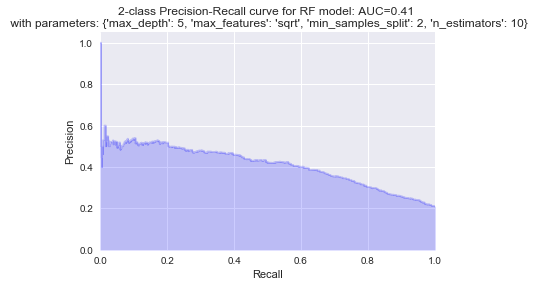

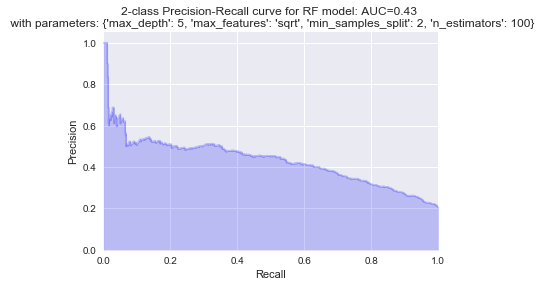

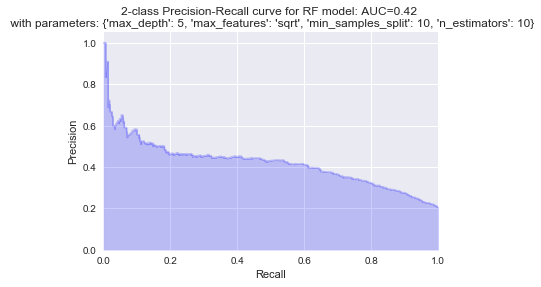

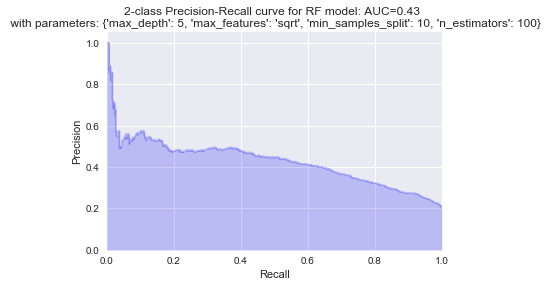

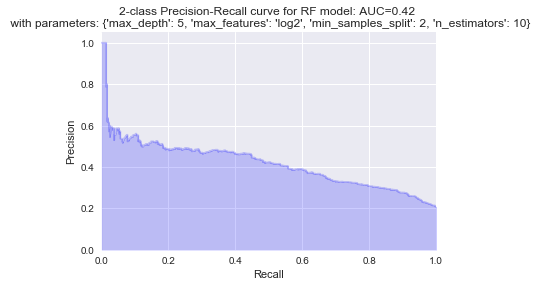

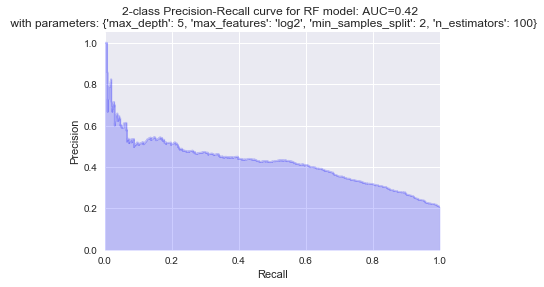

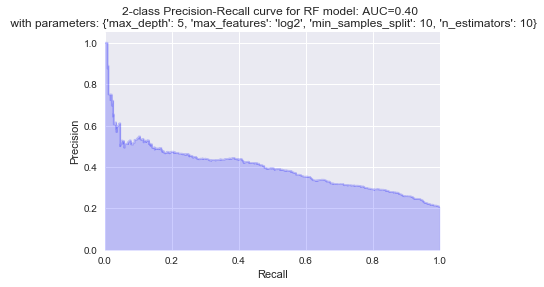

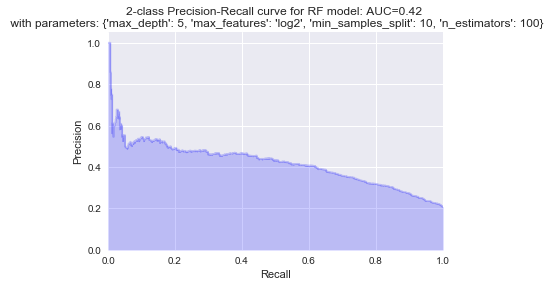

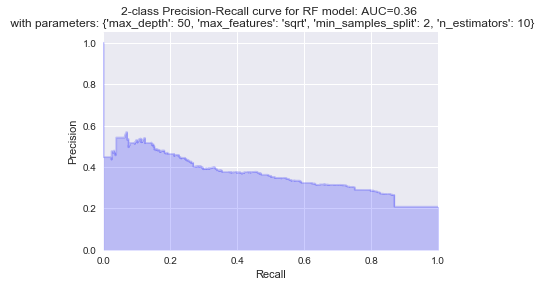

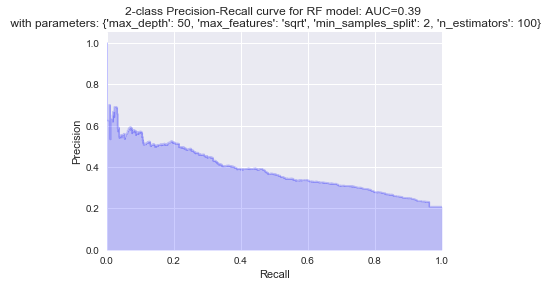

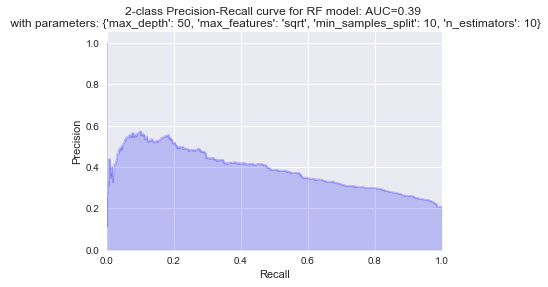

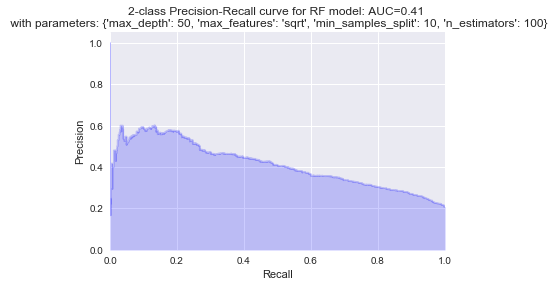

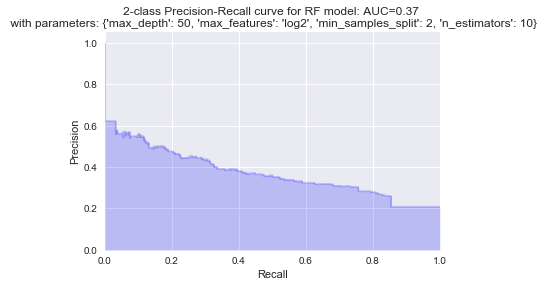

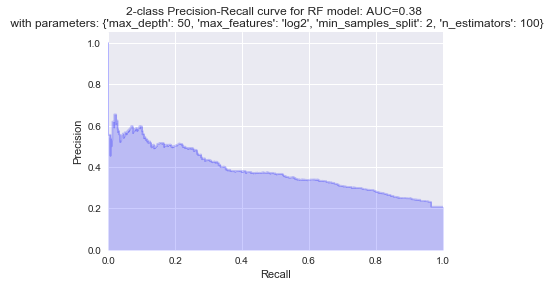

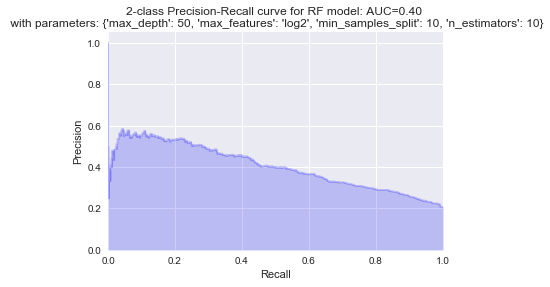

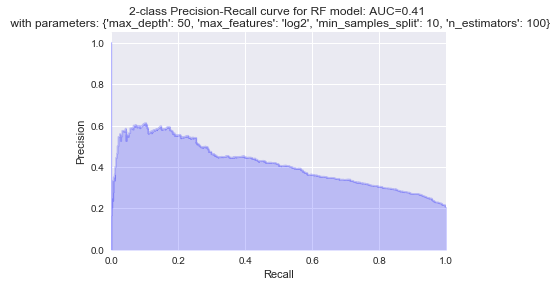

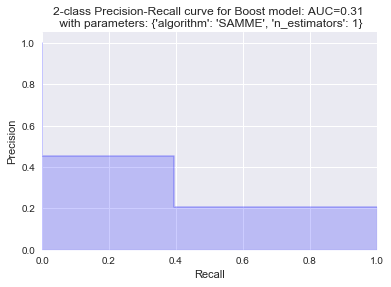

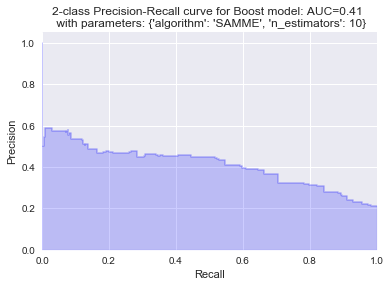

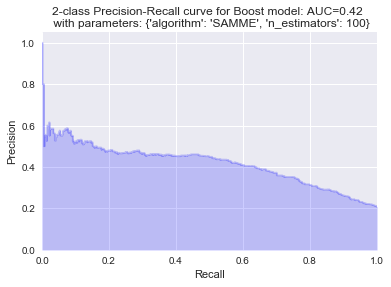

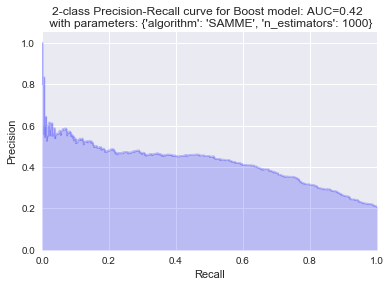

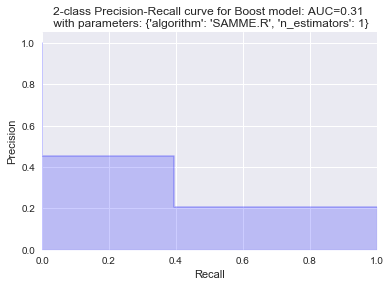

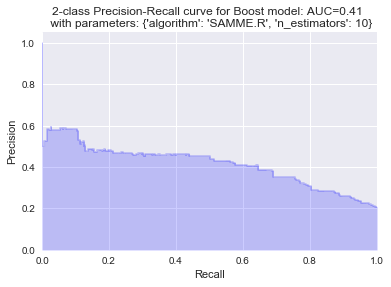

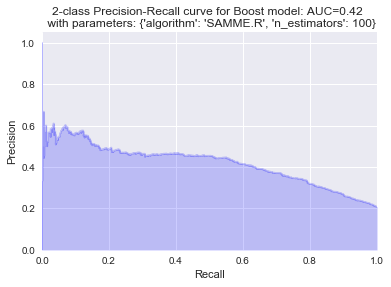

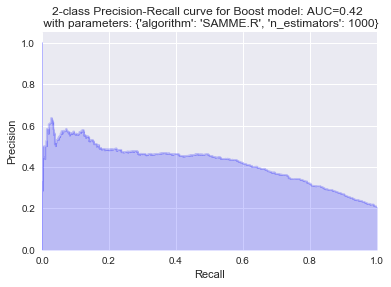

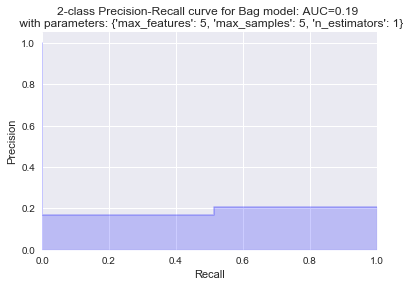

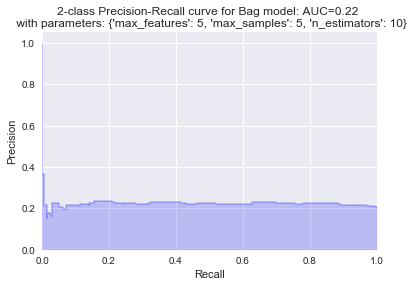

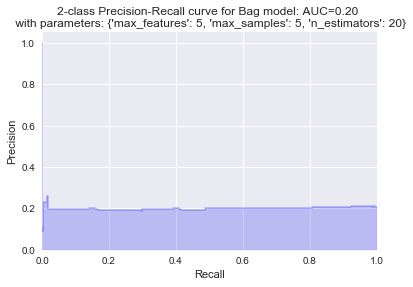

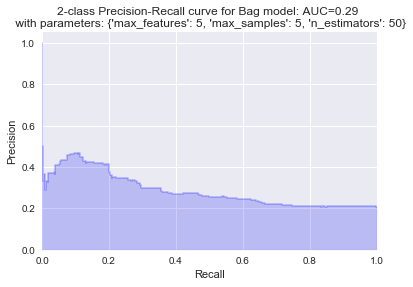

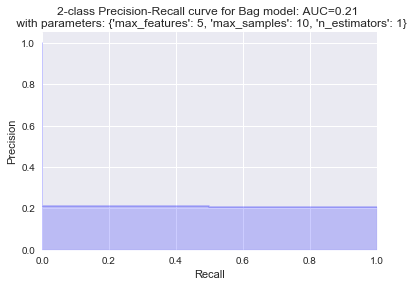

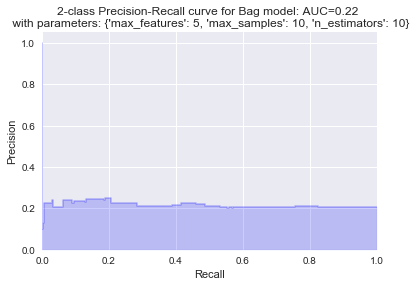

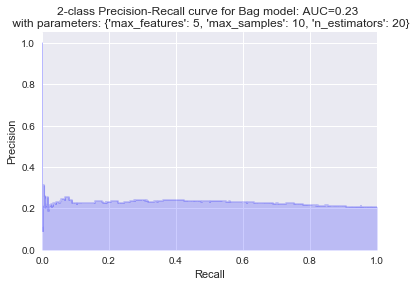

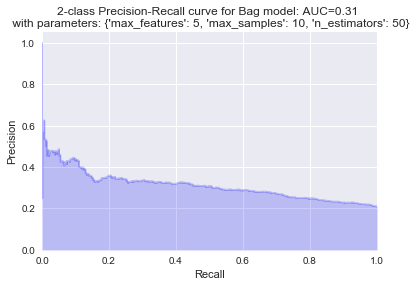

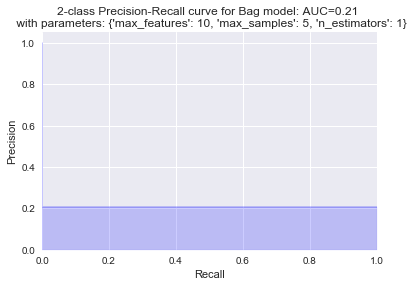

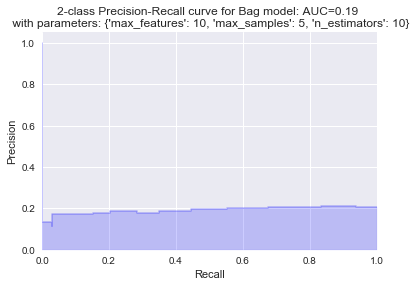

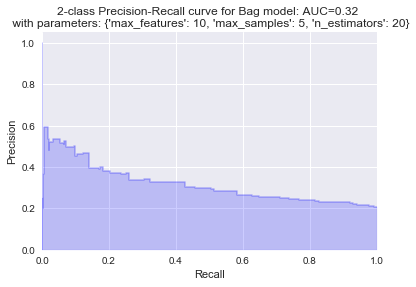

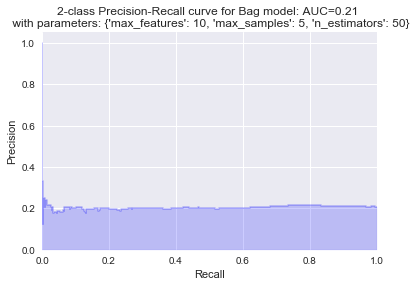

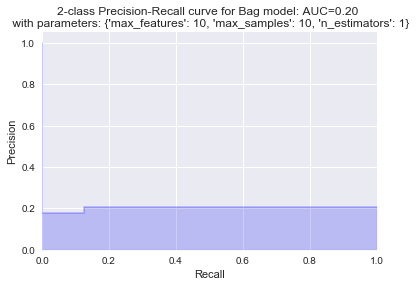

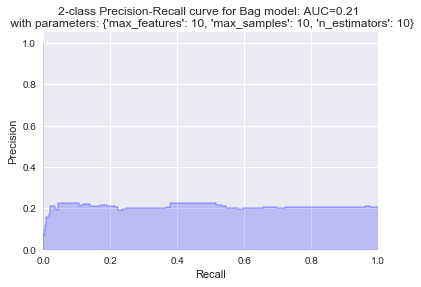

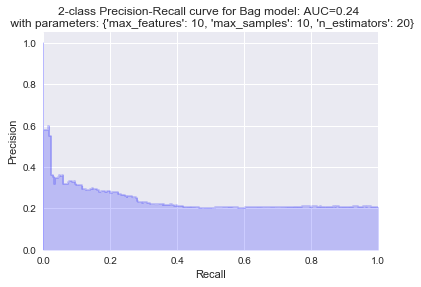

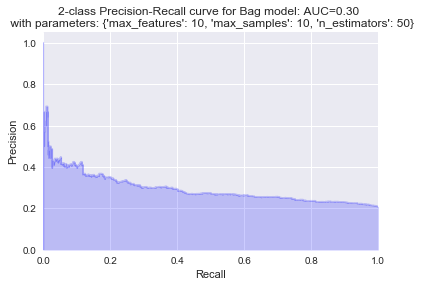

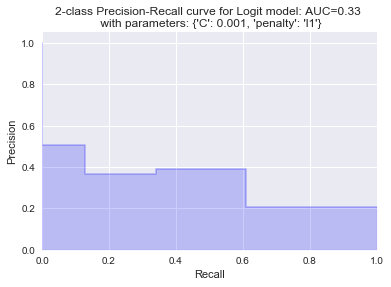

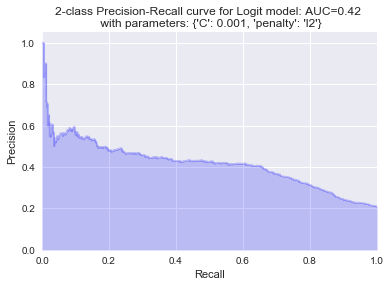

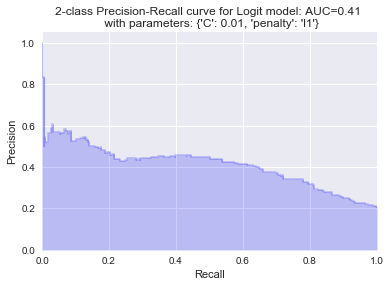

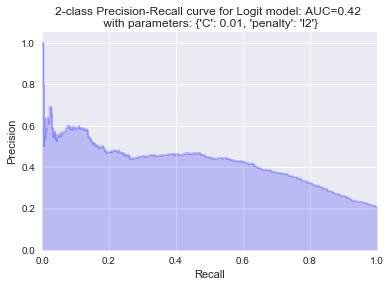

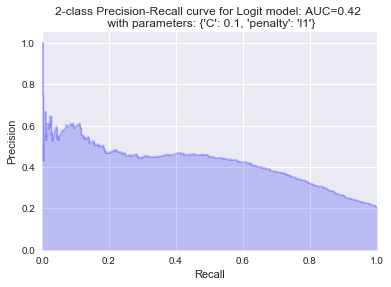

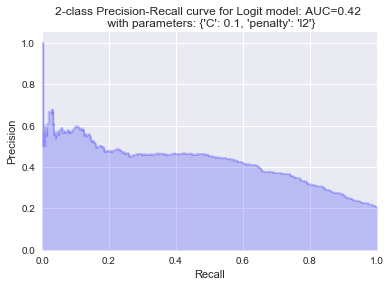

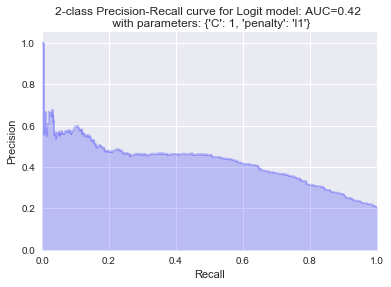

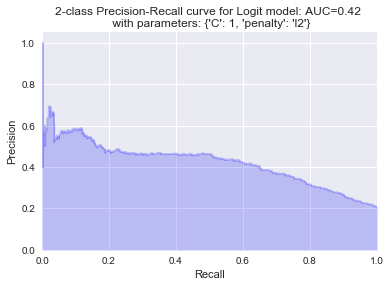

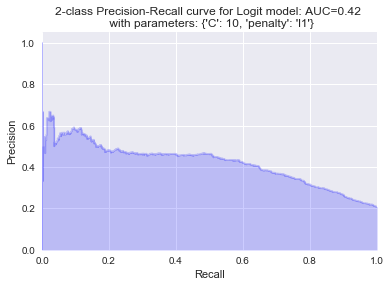

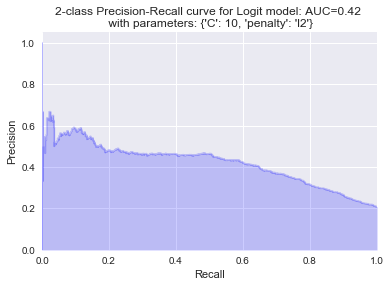

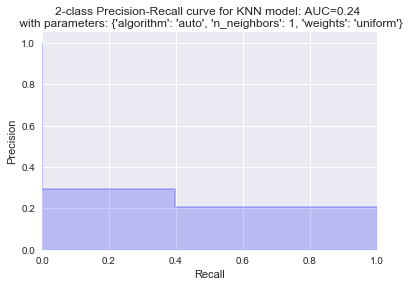

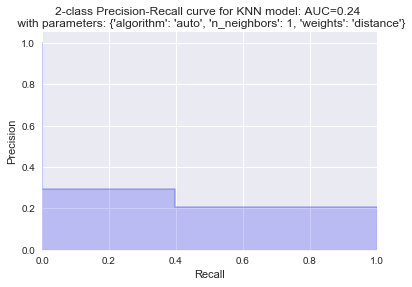

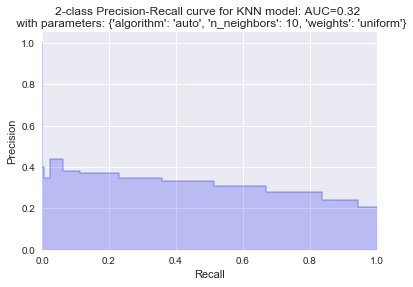

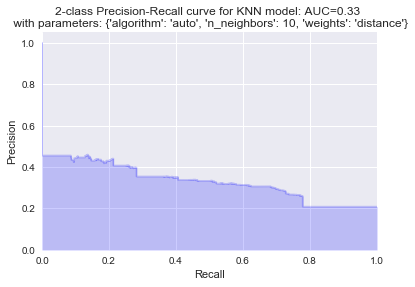

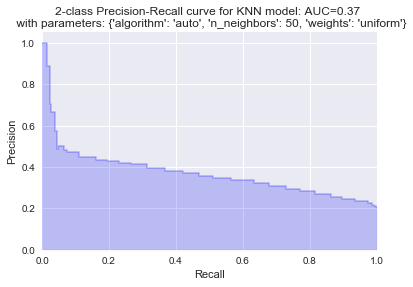

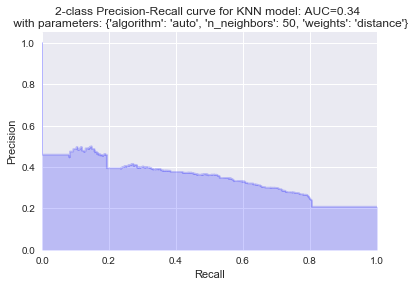

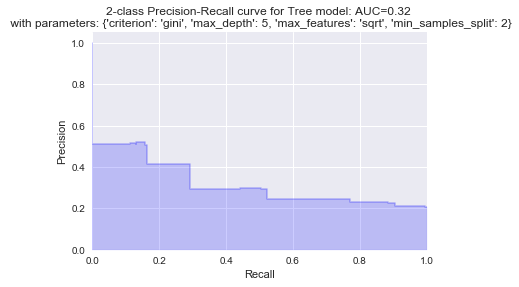

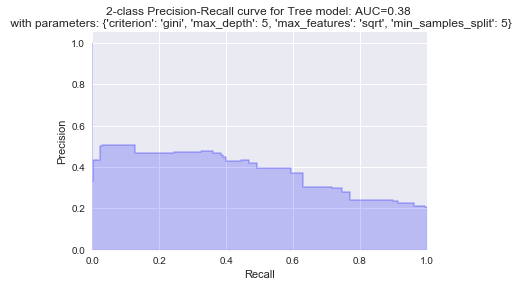

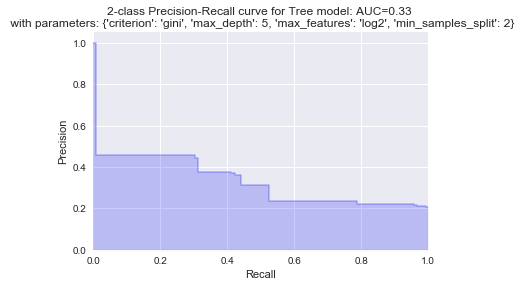

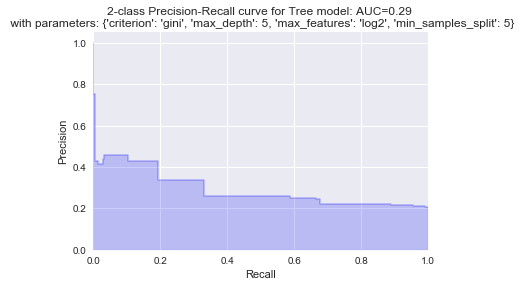

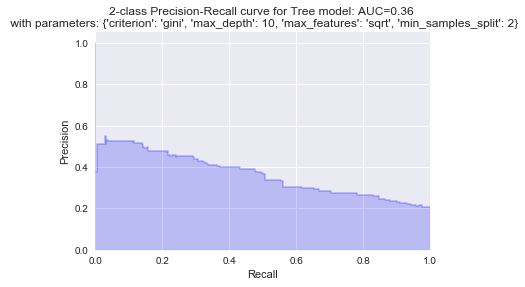

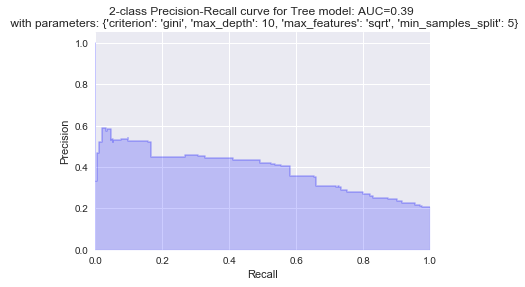

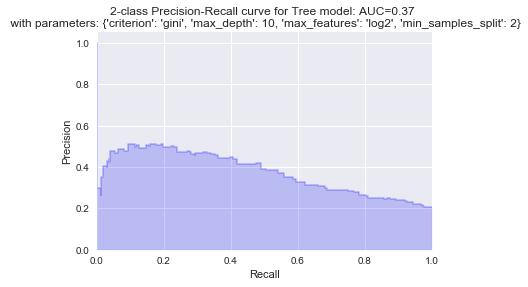

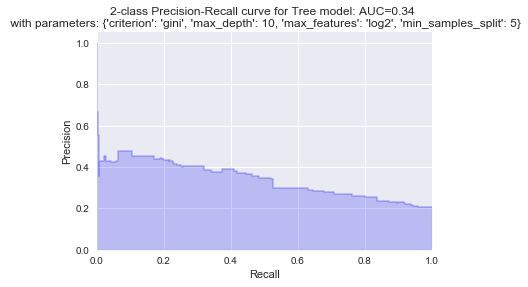

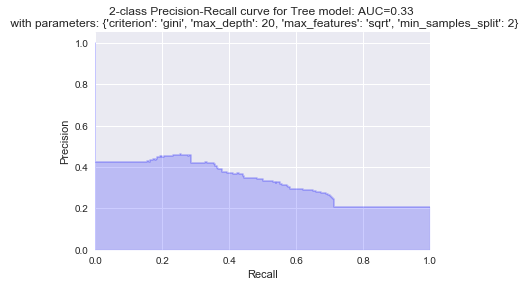

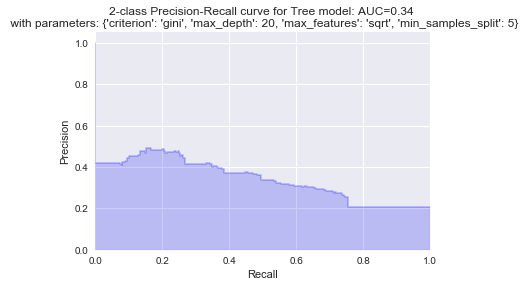

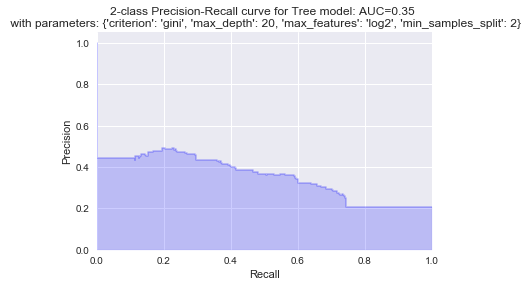

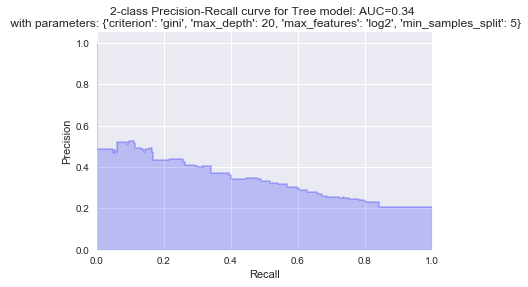

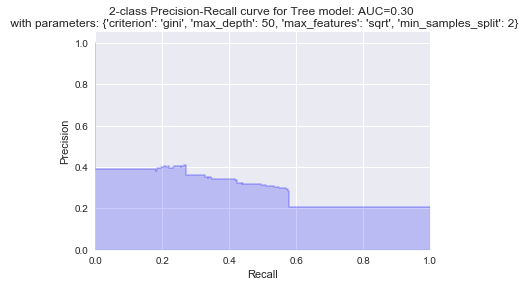

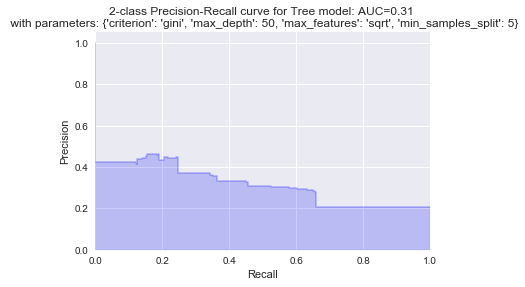

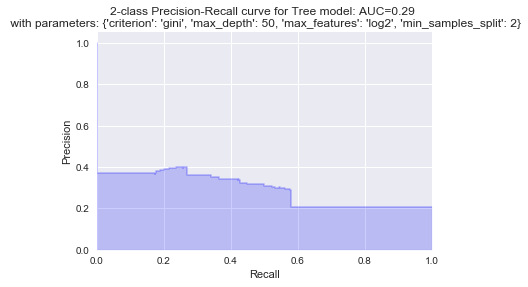

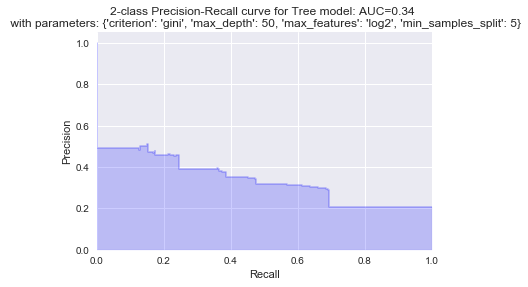

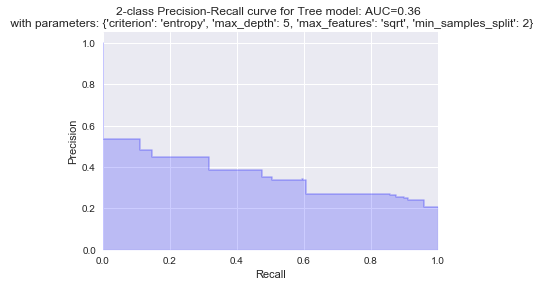

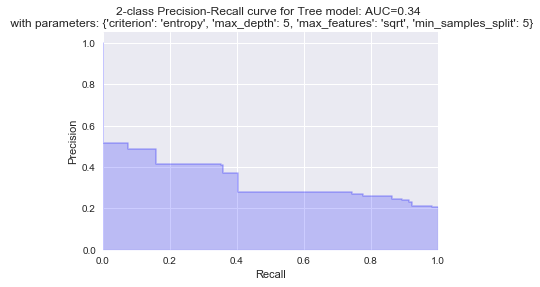

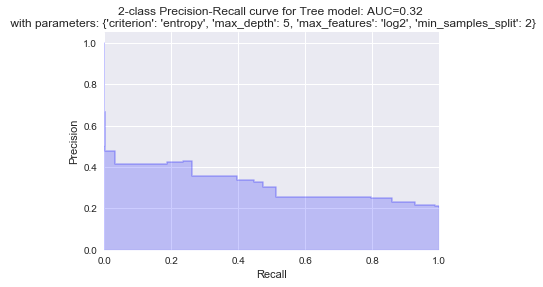

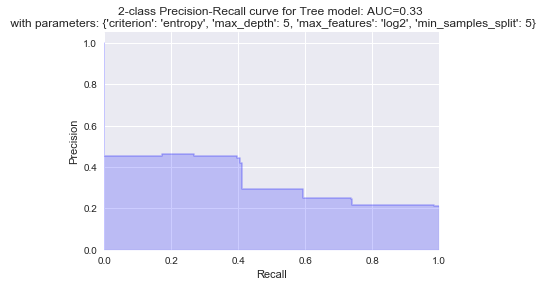

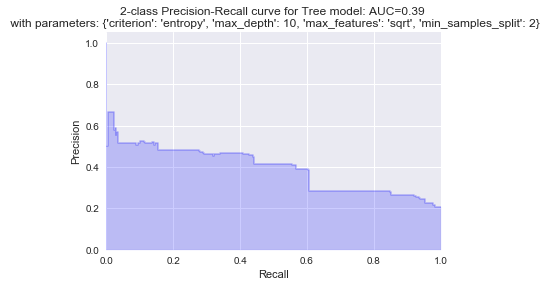

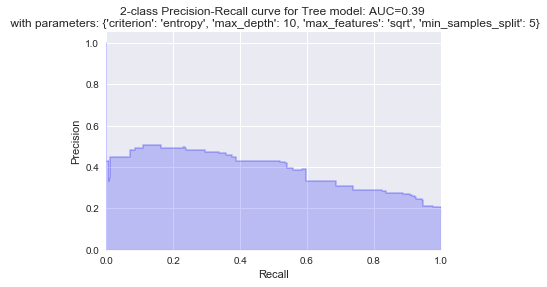

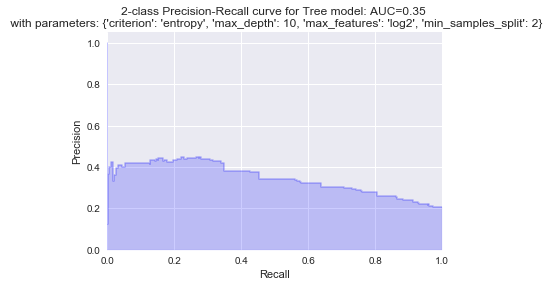

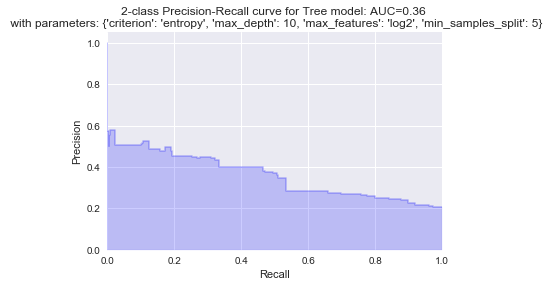

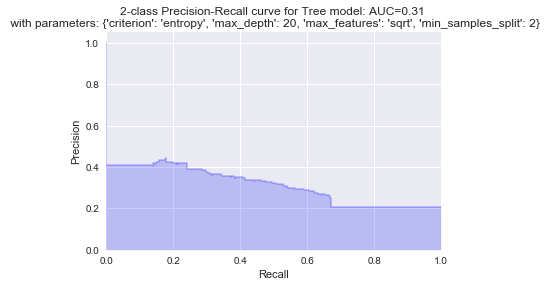

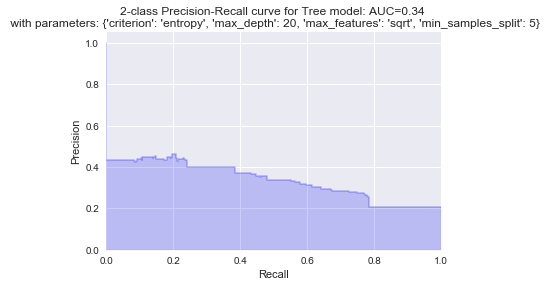

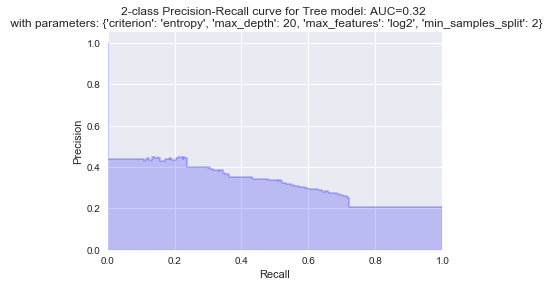

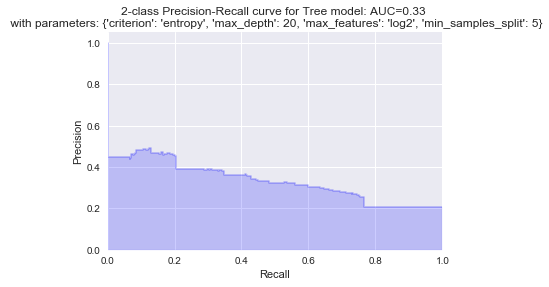

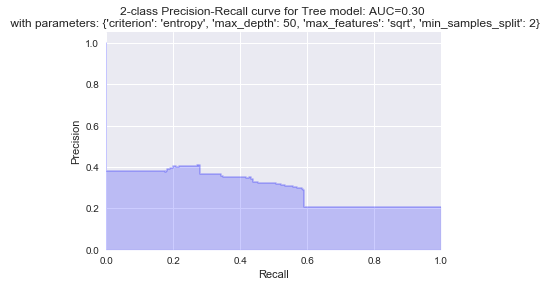

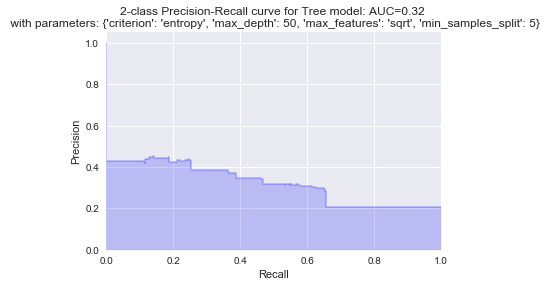

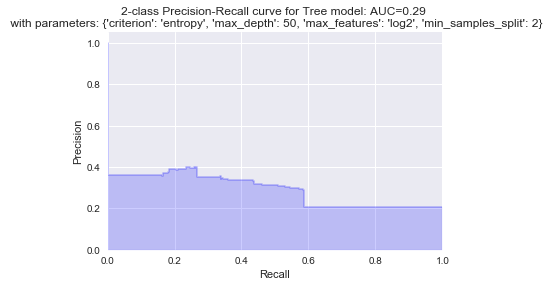

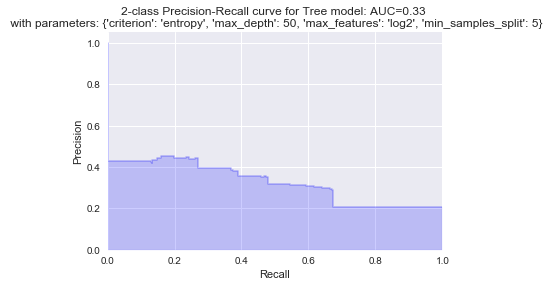

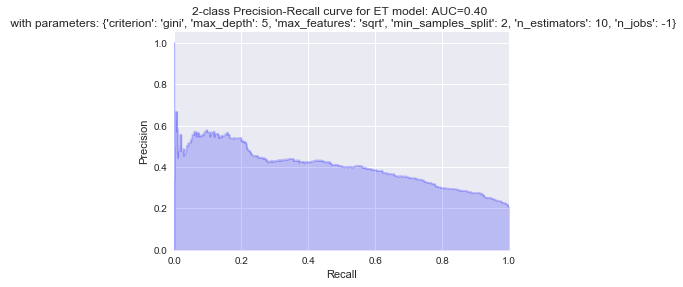

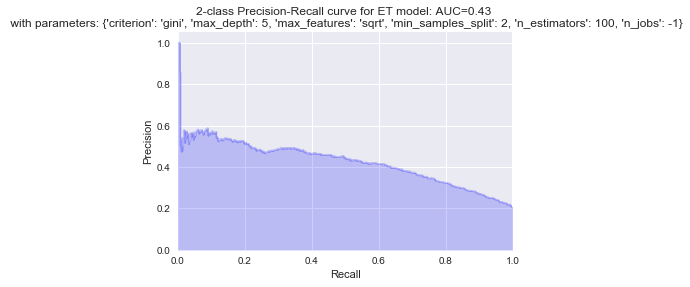

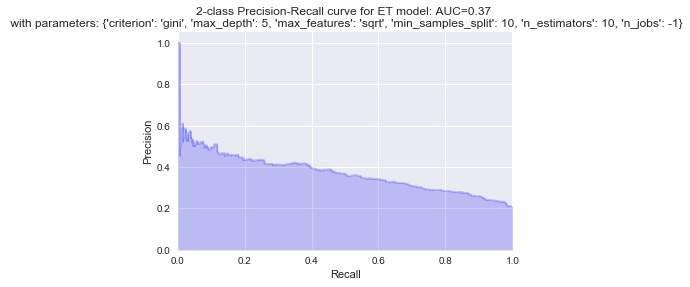

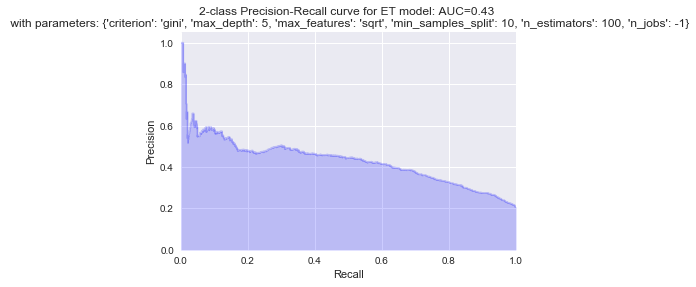

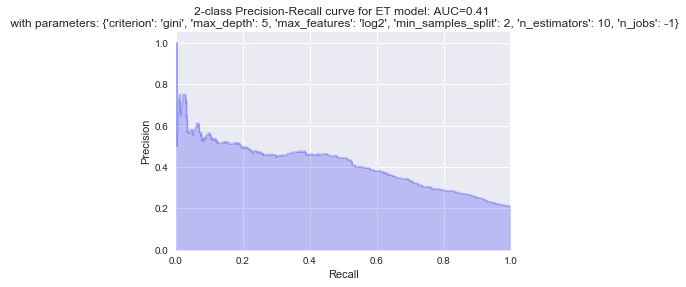

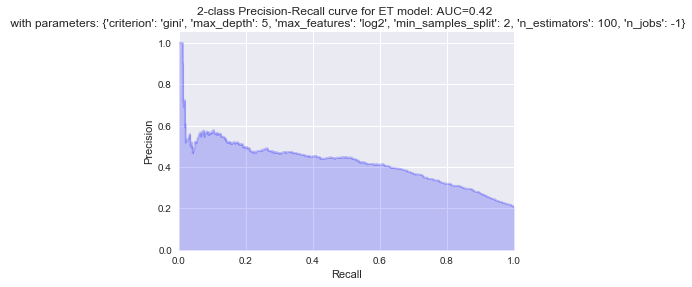

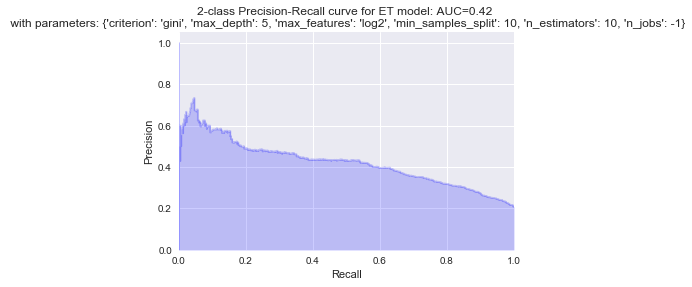

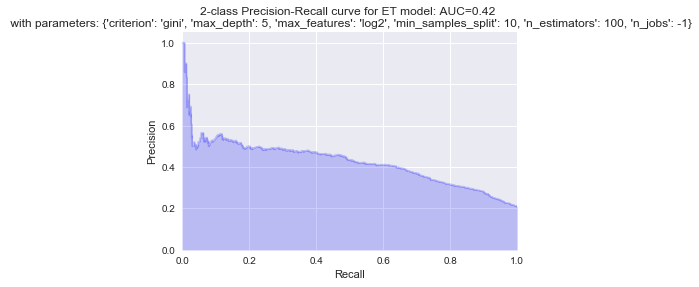

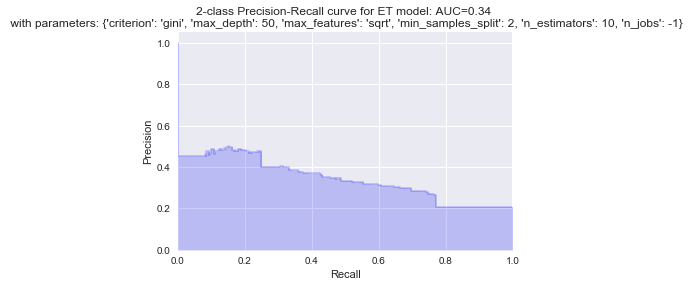

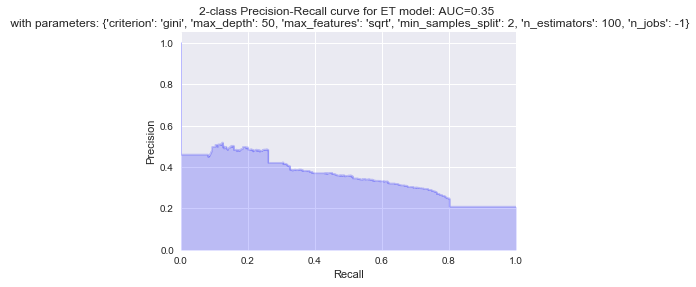

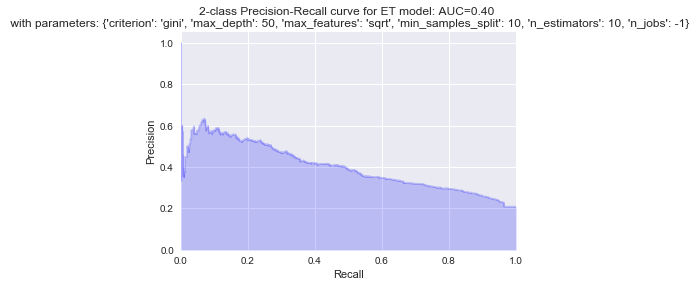

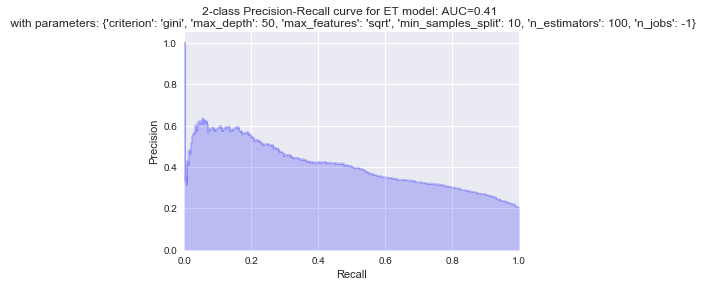

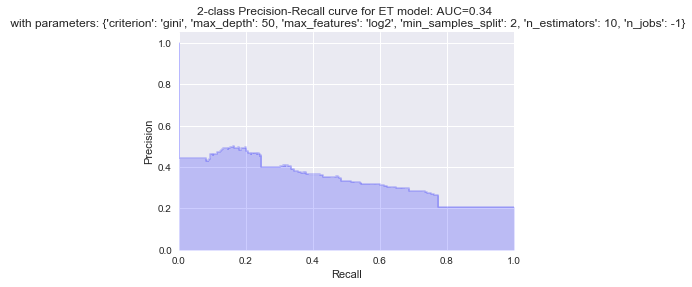

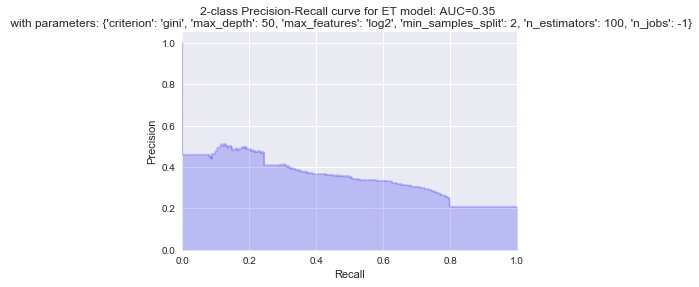

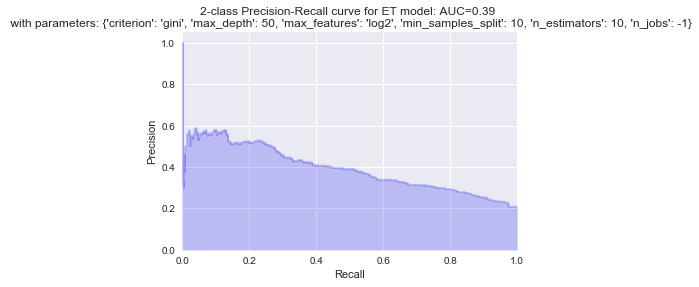

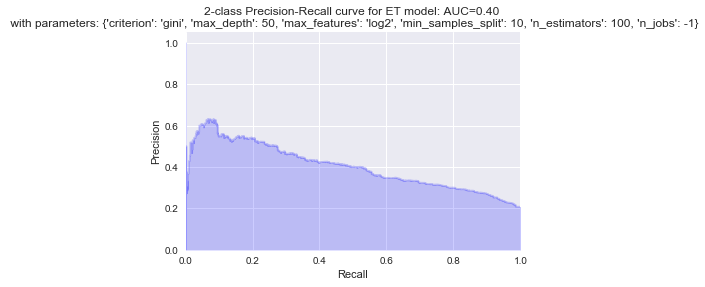

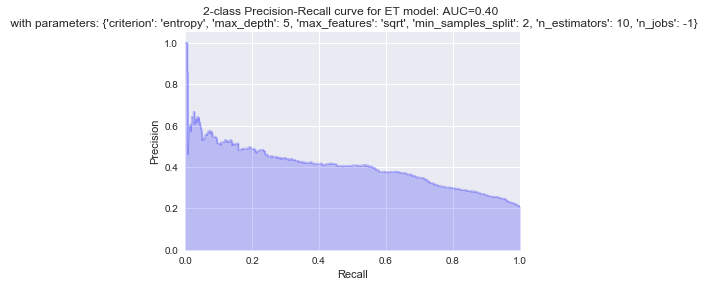

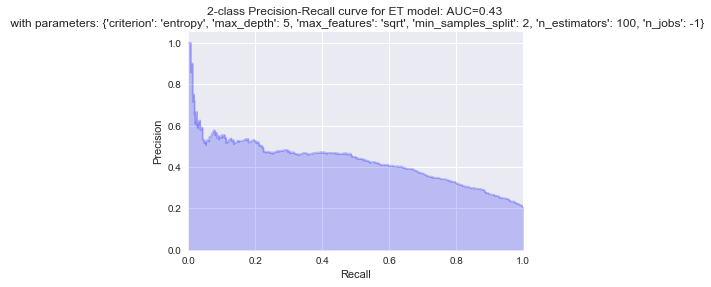

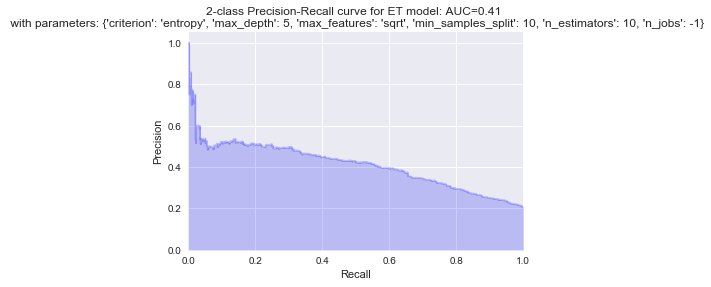

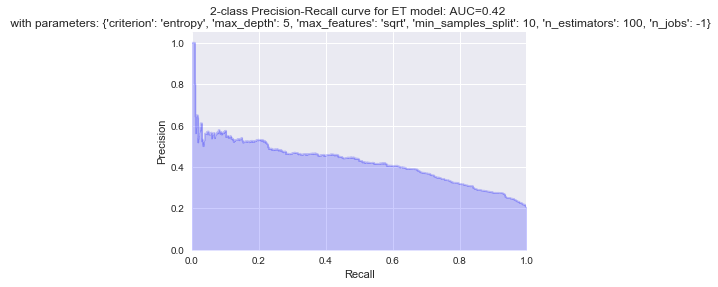

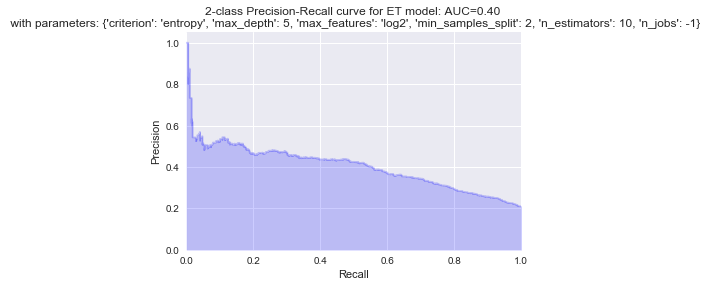

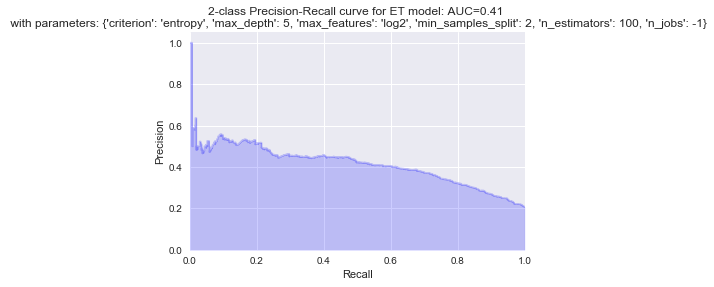

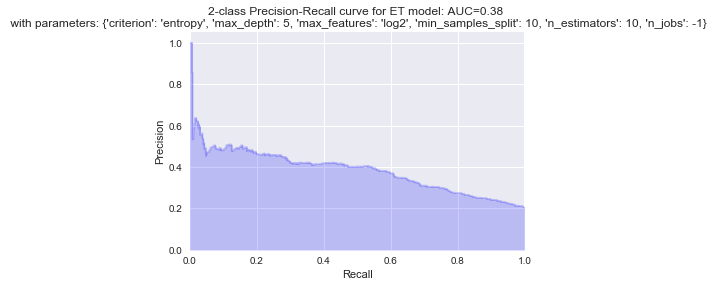

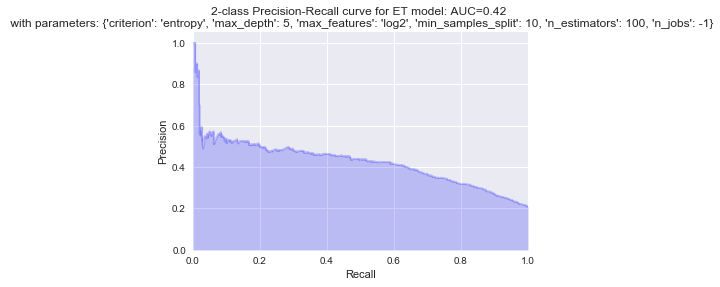

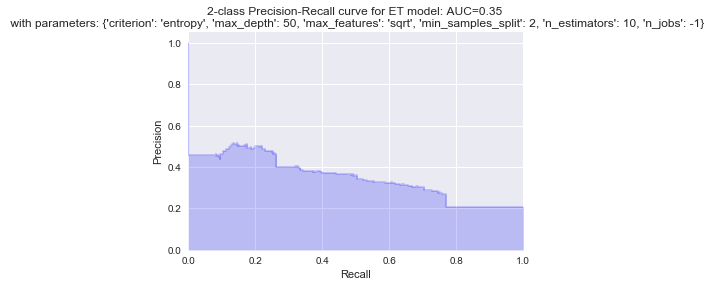

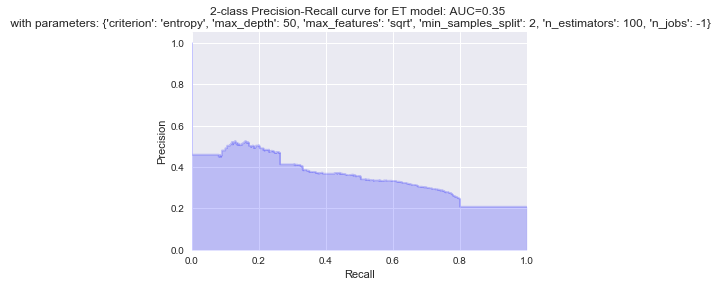

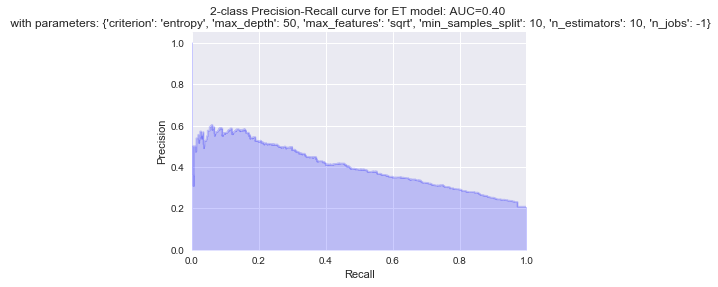

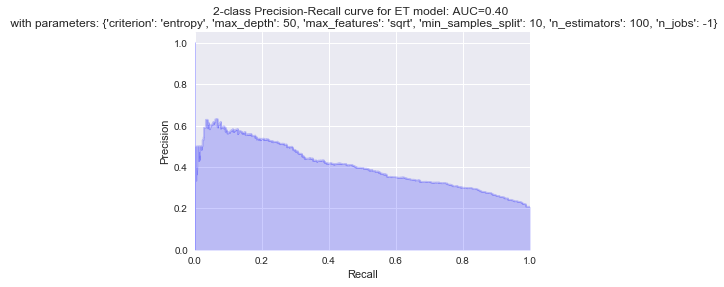

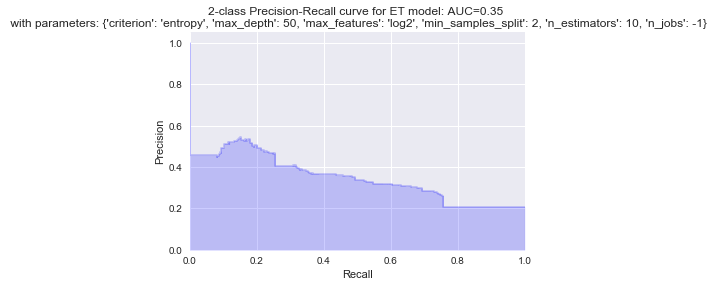

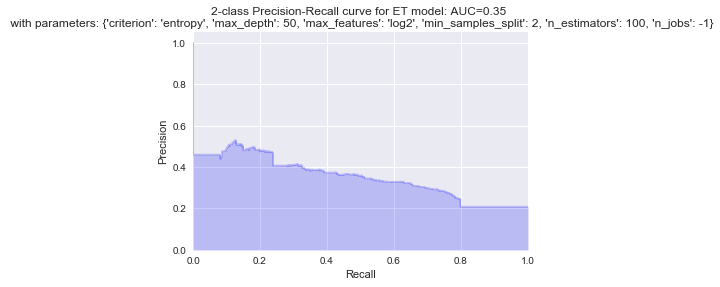

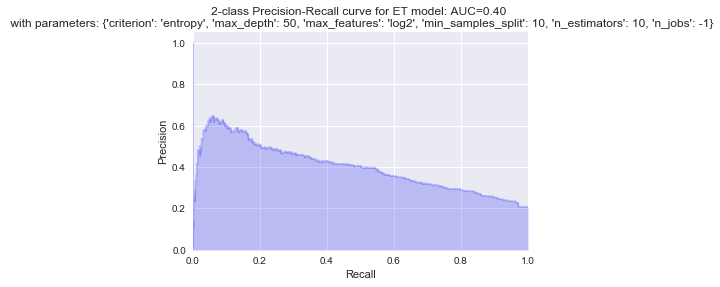

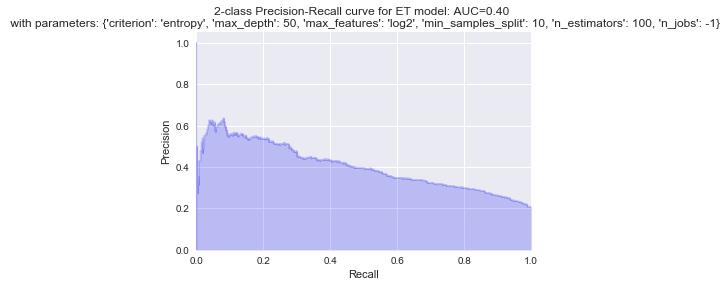

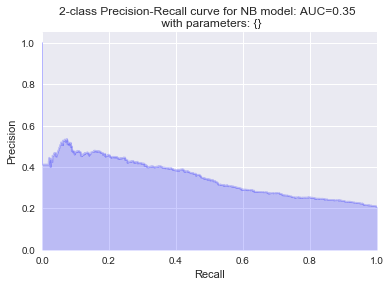

In [55]:
results = clf_loop(["RF", "Boost", "Bag", "Logit", "KNN", "Tree",  "ET", "NB"], x_train, x_test, y_train, y_test)

In [56]:
from IPython.display import display
display(results.head(10))

model_type                                         parameters  auc-roc  \
0         RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   0.7351   
1         RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   0.7489   
2         RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   0.7419   
3         RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   0.7516   
4         RF  {'max_depth': 5, 'max_features': 'log2', 'min_...   0.7374   
5         RF  {'max_depth': 5, 'max_features': 'log2', 'min_...   0.7404   
6         RF  {'max_depth': 5, 'max_features': 'log2', 'min_...   0.7156   
7         RF  {'max_depth': 5, 'max_features': 'log2', 'min_...   0.7429   
8         RF  {'max_depth': 50, 'max_features': 'sqrt', 'min...   0.6929   
9         RF  {'max_depth': 50, 'max_features': 'sqrt', 'min...   0.7006   

   precision    time  precision,recall,f1 at_5 precision,recall,f1 at_10  \
0     0.4096  0.1094  (0.5176, 0.1241, 0.2002)   (0.4941, 0.237, 0.3203)   
1     0.4319  0.6880  (0.5412, 0.1298, 0.2093)  (0.4912, 0.2355, 0.3184)   
2     0.4194  0.0927  (0.5235, 0.1255, 0.2025)  (0.4647, 0.2228, 0.3012)   
3     0.4286  0.6523  (0.5412, 0.1298, 0.2093)  (0.4765, 0.2285, 0.3089)   
4     0.4176  0.0781  (0.5059, 0.1213, 0.1957)  (0.4912, 0.2355, 0.3184)   
5     0.4214  0.5903  (0.5294, 0.1269, 0.2048)  (0.4824, 0.2313, 0.3127)   
6     0.3958  0.0803  (0.5235, 0.1255, 0.2025)  (0.4794, 0.2299, 0.3108)   
7     0.4186  0.6155  (0.5353, 0.1283, 0.2071)  (0.4765, 0.2285, 0.3089)   
8     0.3604  0.3338  (0.5176, 0.1241, 0.2002)    (0.4588, 0.22, 0.2974)   
9     0.3851  2.7878  (0.5176, 0.1241, 0.2002)  (0.4912, 0.2355, 0.3184)   

  precision,recall,f1 at_20 precision,recall,f1 at_30  \
0  (0.4464, 0.4288, 0.4374)  (0.4061, 0.5853, 0.4795)   
1  (0.4567, 0.4386, 0.4475)  (0.4119, 0.5938, 0.4864)   
2  (0.4376, 0.4203, 0.4288)   (0.4159, 0.5994, 0.491)   
3  (0.4581, 0.4401, 0.4489)  (0.4139, 0.5966, 0.4887)   
4   (0.464, 0.4457, 0.4547)  (0.3924, 0.5656, 0.4633)   
5  (0.4376, 0.4203, 0.4288)  (0.4119, 0.5938, 0.4864)   
6  (0.4288, 0.4118, 0.4201)  (0.3826, 0.5515, 0.4518)   
7  (0.4523, 0.4344, 0.4432)    (0.409, 0.5896, 0.483)   
8  (0.3906, 0.3752, 0.3827)  (0.3523, 0.5078, 0.4159)   
9  (0.3979, 0.3822, 0.3899)  (0.3581, 0.5162, 0.4229)   

  precision,recall,f1 at_50  
0  (0.3218, 0.7729, 0.4544)  
1  (0.3282, 0.7884, 0.4635)  
2   (0.3277, 0.787, 0.4627)  
3  (0.3282, 0.7884, 0.4635)  
4  (0.3188, 0.7659, 0.4502)  
5  (0.3224, 0.7743, 0.4552)  
6    (0.31, 0.7447, 0.4378)  
7  (0.3224, 0.7743, 0.4552)  
8  (0.3053, 0.7334, 0.4312)  
9   (0.3059, 0.7348, 0.432)

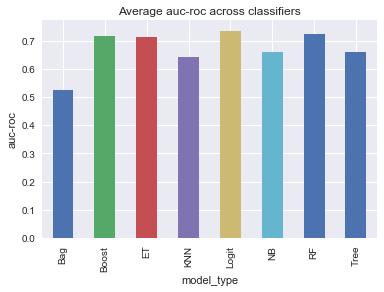

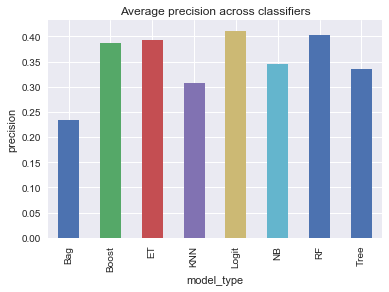

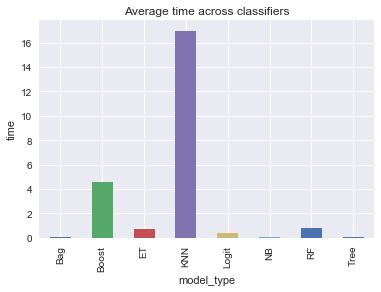

In [57]:
for item in ['auc-roc','precision','time']:
    plt.figure()
    results.groupby(['model_type'])[item].mean().plot(kind='bar', title='Average '+item+' across classifiers')
    plt.ylabel(item)

In [58]:
def best_grid(rdf, method = "auc-roc"):
    '''
    Iterate over the results and get the best parameters for each classifier
    and save the best_grid as a dictionary
    
    '''
    best = {}
    model = rdf.groupby("model_type")[method].nlargest(1)
    model = model.to_frame()
    model.reset_index(inplace = True)
    rows = list(model['level_1'])
    display(rdf.loc[rows].iloc[:,0:8])
    for row in rows:
        key = rdf.loc[row]["model_type"]
        v = rdf.loc[row]["parameters"]
        best[key] = v
    
    for k,arg in best.items():
        for key,val in arg.items():
            arg[key] = [val]

    return best

In [59]:
best = best_grid(results)

model_type                                         parameters  auc-roc  \
31         Bag  {'max_features': 5, 'max_samples': 10, 'n_esti...   0.6378   
22       Boost      {'algorithm': 'SAMME.R', 'n_estimators': 100}   0.7453   
91          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...   0.7522   
54         KNN  {'algorithm': 'auto', 'n_neighbors': 50, 'weig...   0.7038   
44       Logit                        {'C': 0.1, 'penalty': 'l1'}   0.7446   
120         NB                                                 {}   0.6612   
3           RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   0.7516   
76        Tree  {'criterion': 'entropy', 'max_depth': 10, 'max...   0.7287   

     precision     time  precision,recall,f1 at_5 precision,recall,f1 at_10  \
31      0.3097   0.1352  (0.4412, 0.1058, 0.1706)  (0.3324, 0.1594, 0.2154)   
22      0.4184   1.7033  (0.5529, 0.1326, 0.2139)  (0.4824, 0.2313, 0.3127)   
91      0.4305   0.6178  (0.5412, 0.1298, 0.2093)  (0.4676, 0.2243, 0.3031)   
54      0.3717  24.3283  (0.4765, 0.1142, 0.1843)  (0.4706, 0.2257, 0.3051)   
44      0.4221   0.3074  (0.5412, 0.1298, 0.2093)   (0.4735, 0.2271, 0.307)   
120     0.3457   0.0922   (0.4706, 0.1128, 0.182)  (0.4471, 0.2144, 0.2898)   
3       0.4286   0.6523  (0.5412, 0.1298, 0.2093)  (0.4765, 0.2285, 0.3089)   
76      0.3926   0.0271  (0.5294, 0.1269, 0.2048)  (0.5765, 0.2764, 0.3737)   

    precision,recall,f1 at_20  
31   (0.3319, 0.3188, 0.3252)  
22    (0.4552, 0.4372, 0.446)  
91   (0.4596, 0.4415, 0.4504)  
54   (0.4112, 0.3949, 0.4029)  
44   (0.4596, 0.4415, 0.4504)  
120   (0.3935, 0.378, 0.3856)  
3    (0.4581, 0.4401, 0.4489)  
76    (0.4552, 0.4372, 0.446)

In [60]:
best

{'Bag': {'max_features': [5], 'max_samples': [10], 'n_estimators': [50]},
 'Boost': {'algorithm': ['SAMME.R'], 'n_estimators': [100]},
 'ET': {'criterion': ['gini'],
  'max_depth': [5],
  'max_features': ['sqrt'],
  'min_samples_split': [10],
  'n_estimators': [100],
  'n_jobs': [-1]},
 'KNN': {'algorithm': ['auto'], 'n_neighbors': [50], 'weights': ['uniform']},
 'Logit': {'C': [0.1], 'penalty': ['l1']},
 'NB': {},
 'RF': {'max_depth': [5],
  'max_features': ['sqrt'],
  'min_samples_split': [10],
  'n_estimators': [100]},
 'Tree': {'criterion': ['entropy'],
  'max_depth': [10],
  'max_features': ['sqrt'],
  'min_samples_split': [2]}}

In [71]:
def plot_mult(models, x_train, x_test, y_train, y_test, bestm):
    '''
    Run model with the best given params on x and y
    and print out all the best models' on the same graph
    '''
    colors = "bgrcmykw"
    color_index = 0

    fig, ax1 = plt.subplots()
    ax1.set_xlabel('percent of population')
    ax1.set_ylabel('precision', color='b')
    ax2 = ax1.twinx()
    ax2.set_ylabel('recall', color='r')
    for index, clf in enumerate([clfs[x] for x in models]):
        model_params = bestm[models[index]]
        for p in ParameterGrid(model_params):
            try:
                clf.set_params(**p)
                y_pred_probs = clf.fit(x_train, y_train).predict_proba(x_test)[:,1]
                
                precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_test, y_pred_probs)
                precision_curve = precision_curve[:-1]
                recall_curve = recall_curve[:-1]
                pct_above_per_thresh = []
                number_scored = len(y_pred_probs)
                for value in pr_thresholds:
                    num_above_thresh = len(y_pred_probs[y_pred_probs>=value])
                    pct_above_thresh = num_above_thresh / float(number_scored)
                    pct_above_per_thresh.append(pct_above_thresh)
                pct_above_per_thresh = np.array(pct_above_per_thresh)
                
                ax1.plot(pct_above_per_thresh, precision_curve, c=colors[color_index])
                ax2.plot(pct_above_per_thresh, recall_curve, c=colors[color_index])                
            except IndexError as e:
                print(e)
                continue
        color_index += 1
        if color_index >= 7:
            color_index = 0
    ax1.legend(models)
    plt.show()

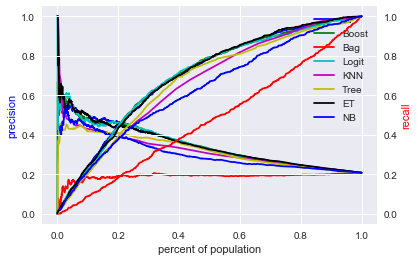

In [77]:
plot_mult(["RF", "Boost", "Bag", "Logit", "KNN", "Tree",  "ET", "NB"], x_train, x_test, y_train, y_test, best)

In [ ]:
#########################################################################

In [57]:
#Running classifiers to predict if the person re-enter within two years

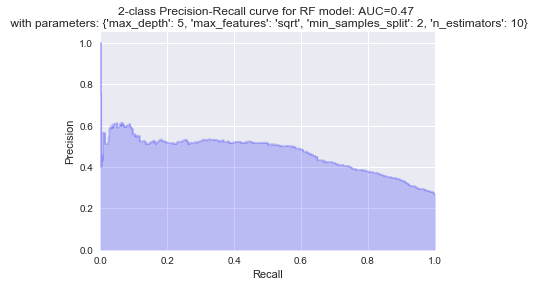

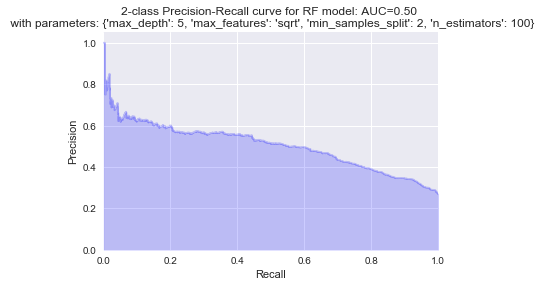

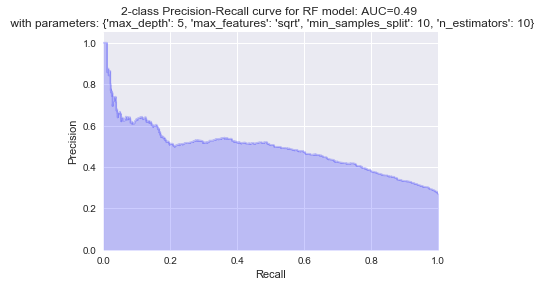

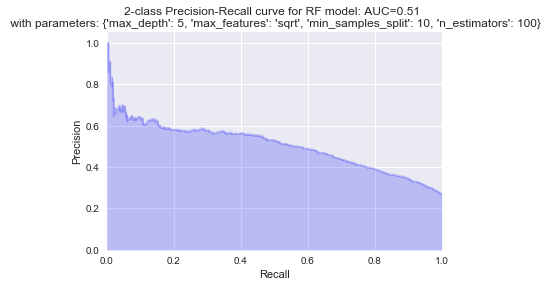

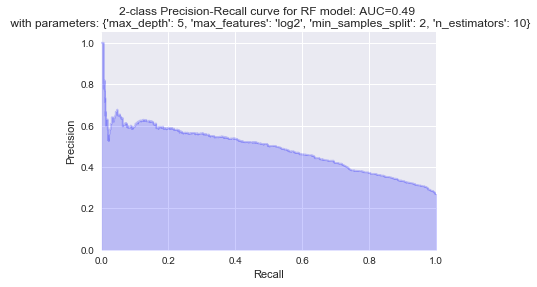

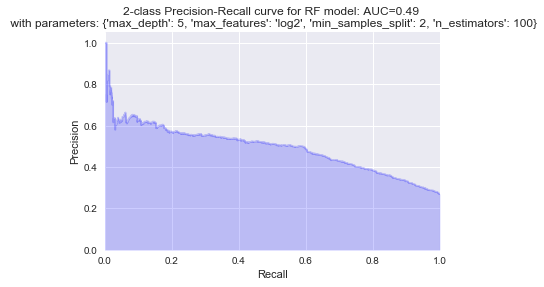

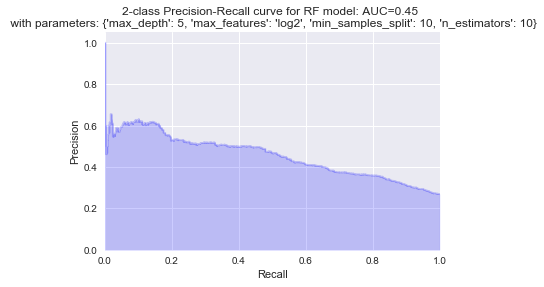

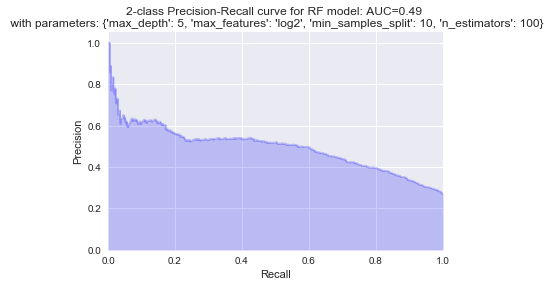

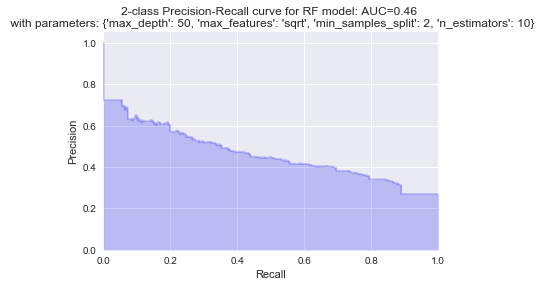

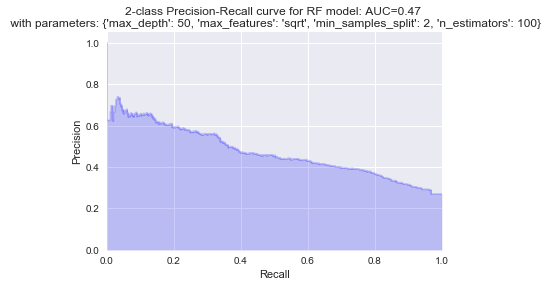

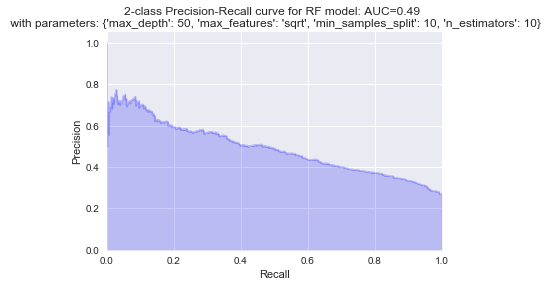

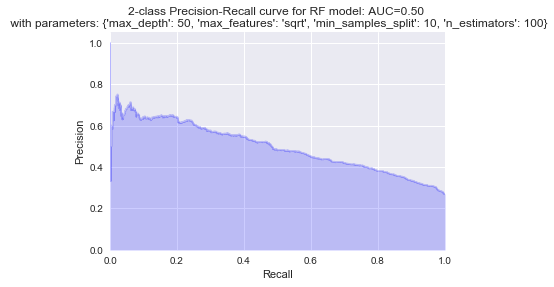

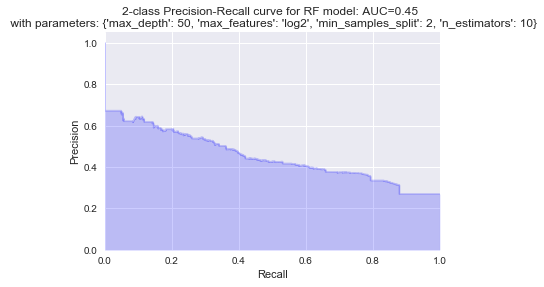

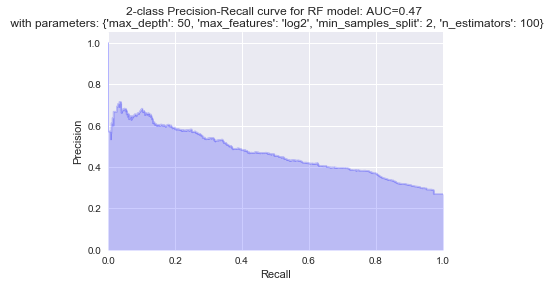

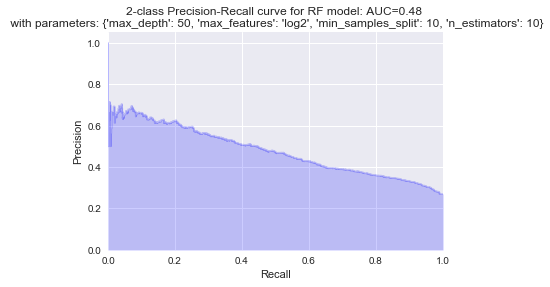

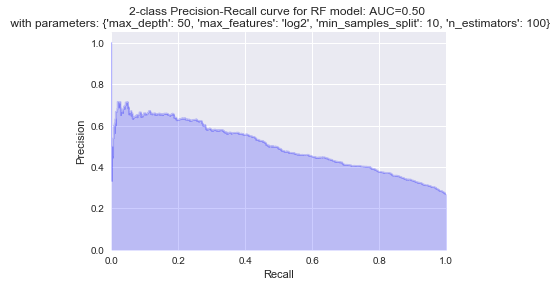

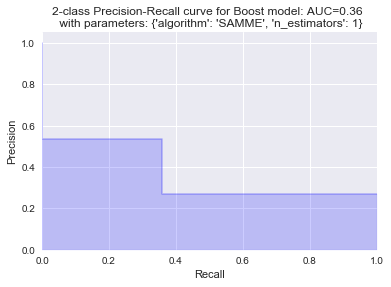

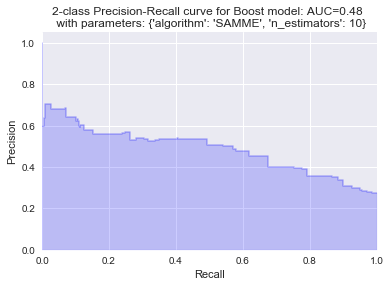

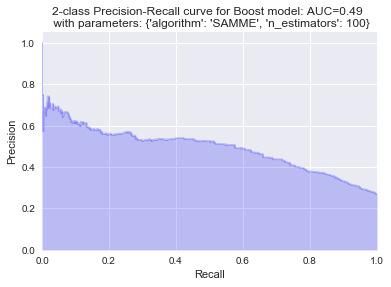

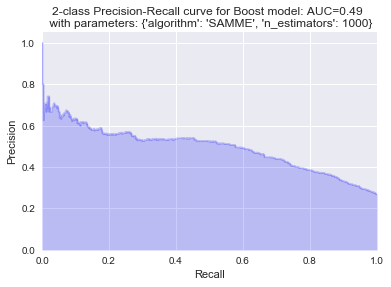

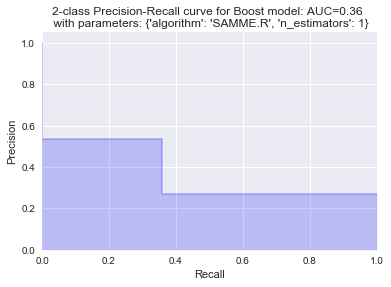

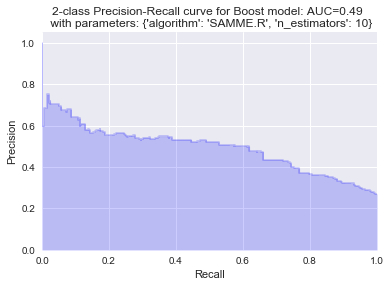

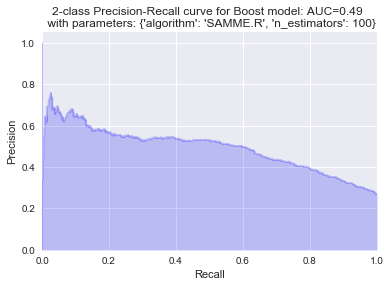

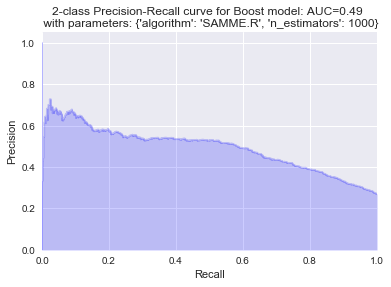

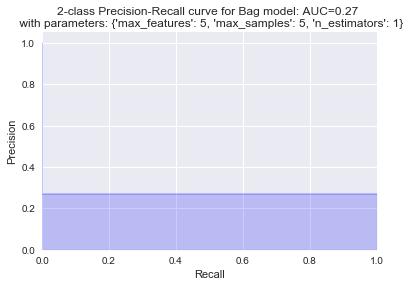

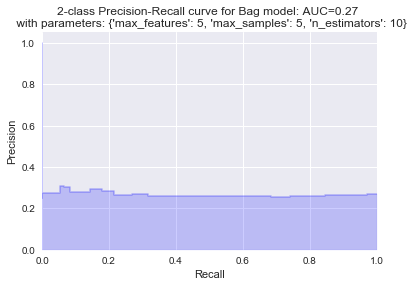

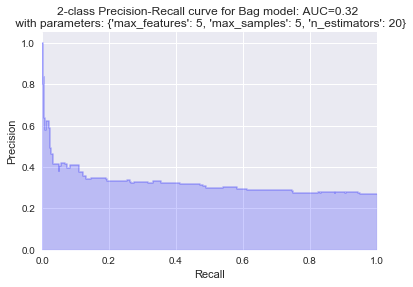

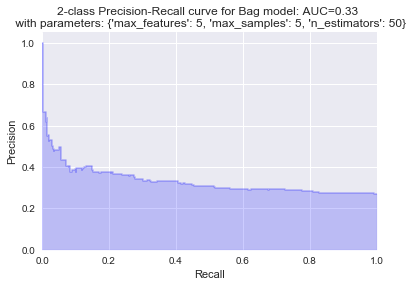

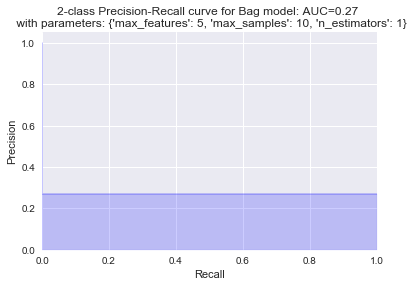

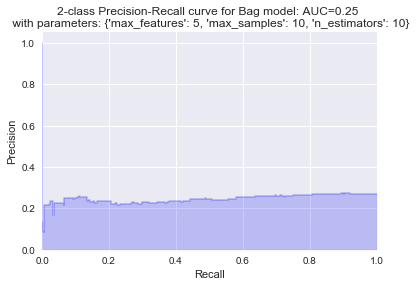

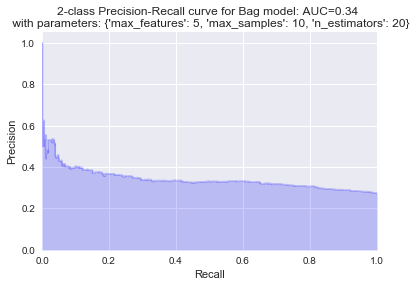

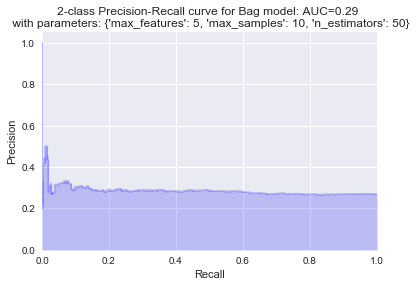

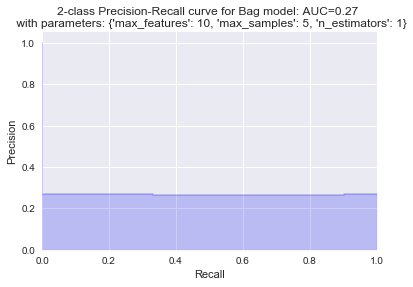

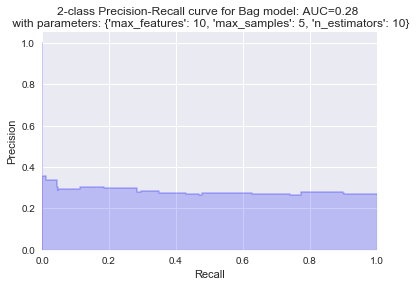

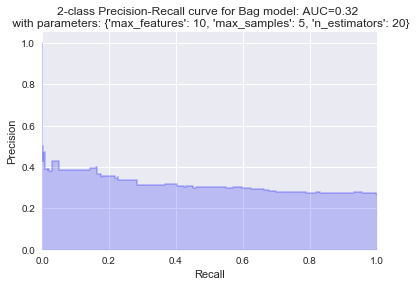

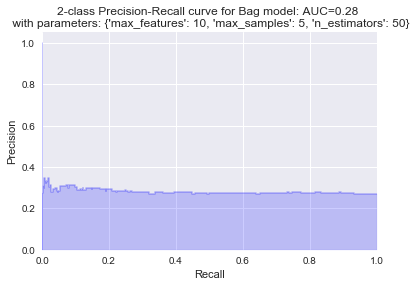

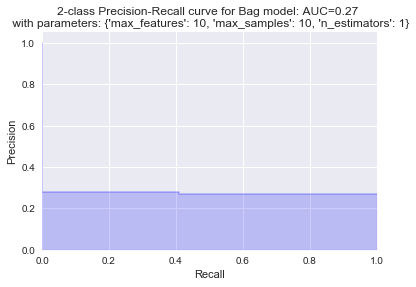

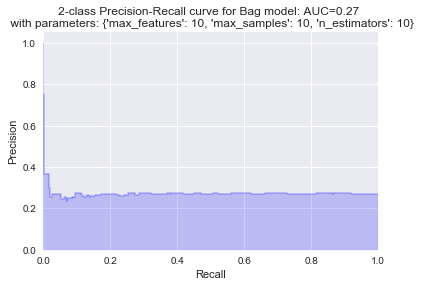

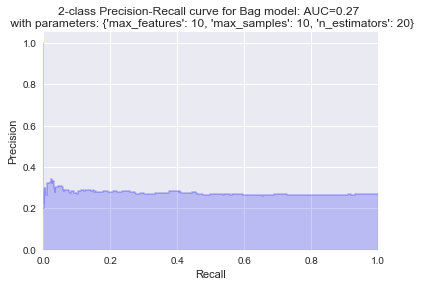

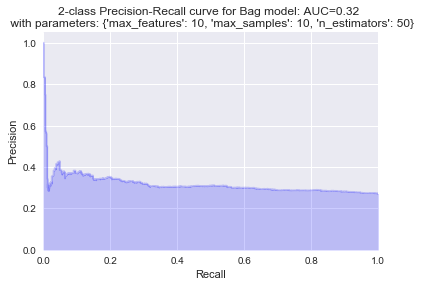

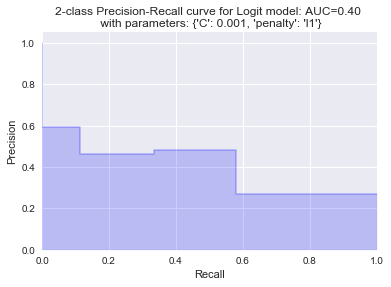

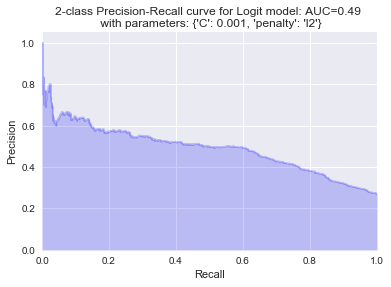

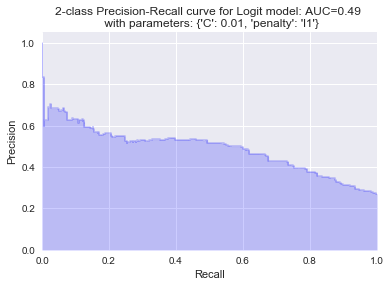

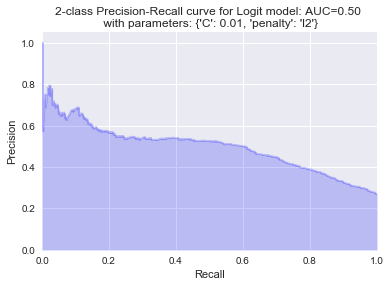

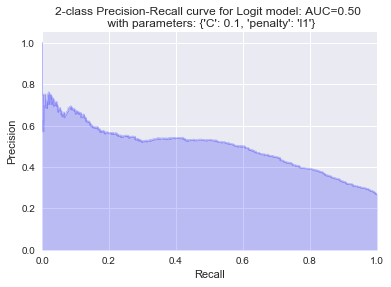

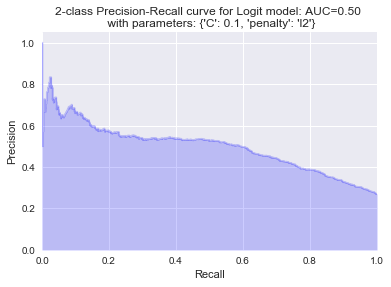

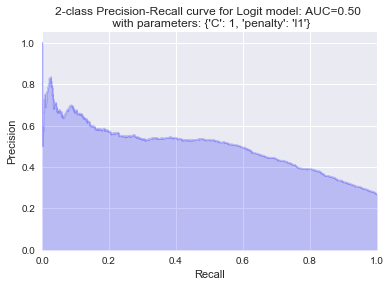

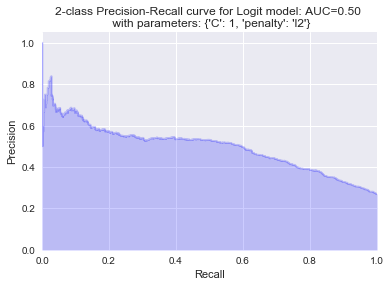

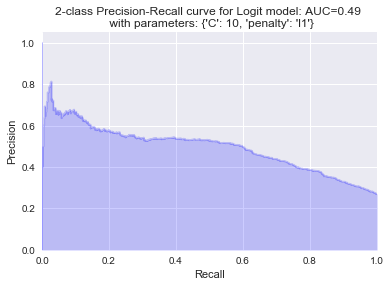

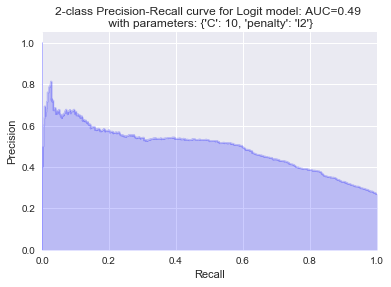

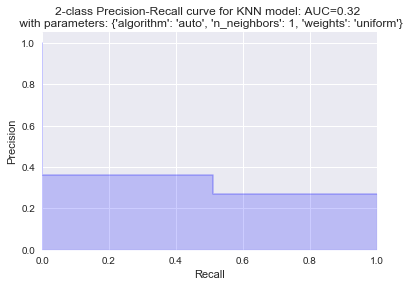

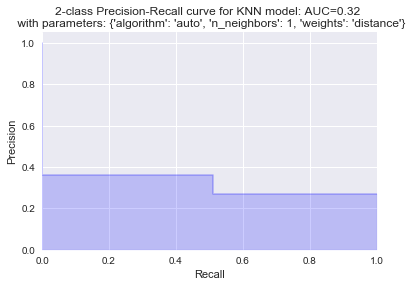

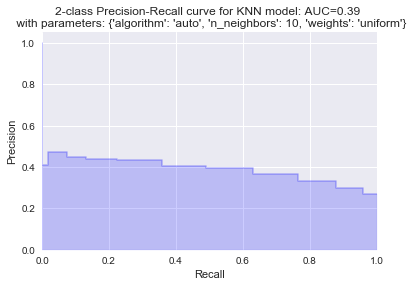

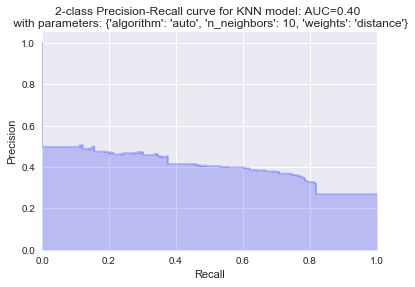

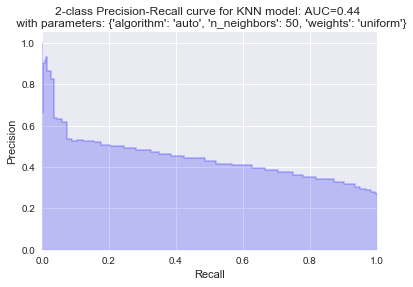

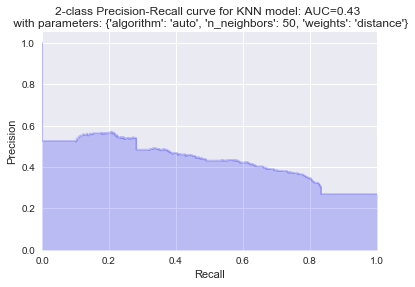

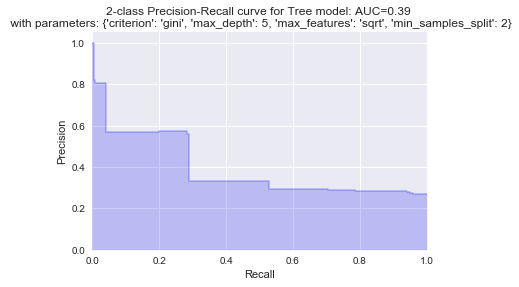

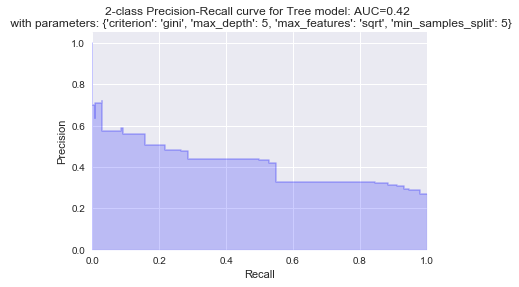

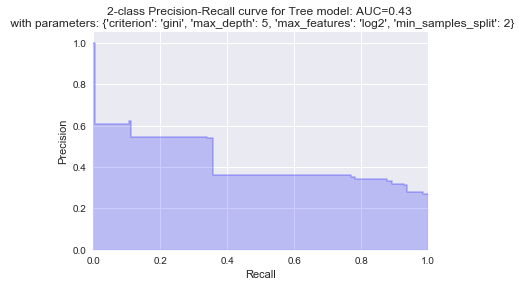

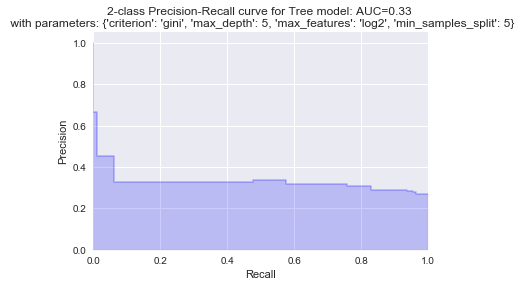

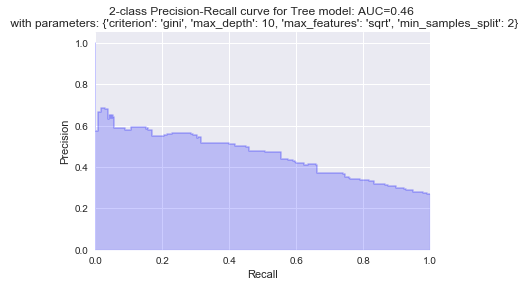

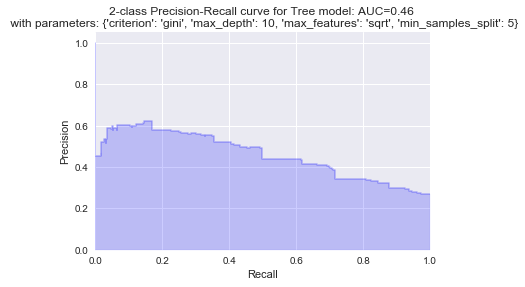

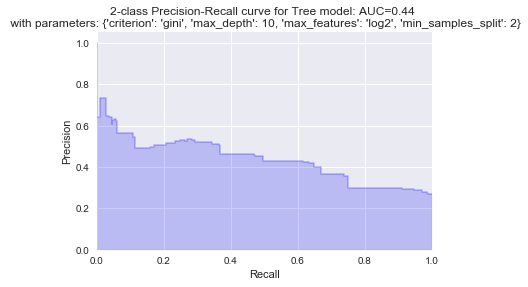

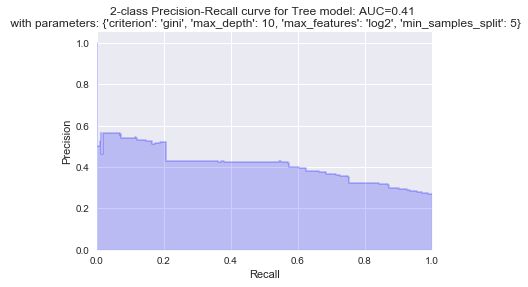

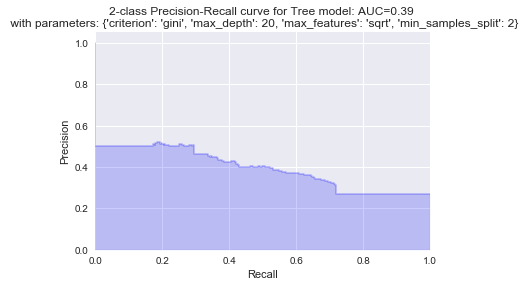

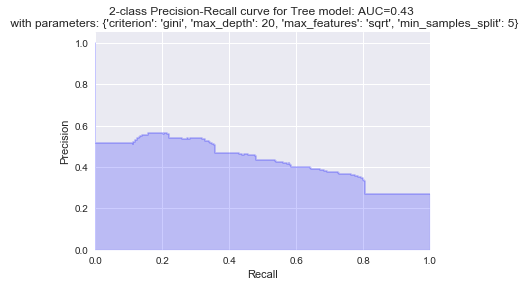

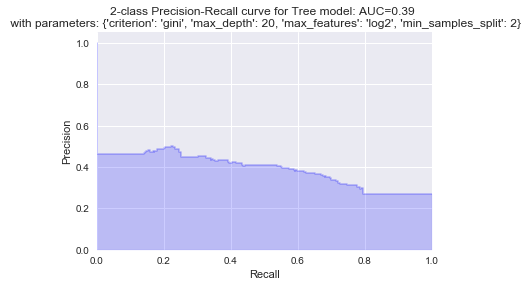

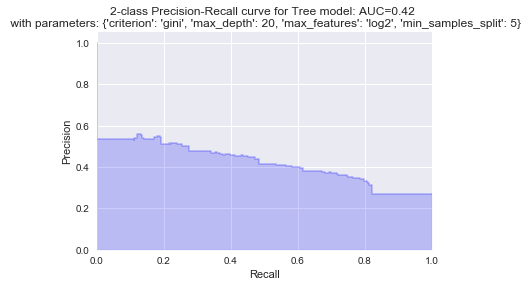

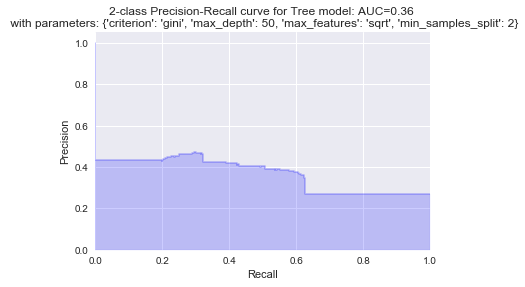

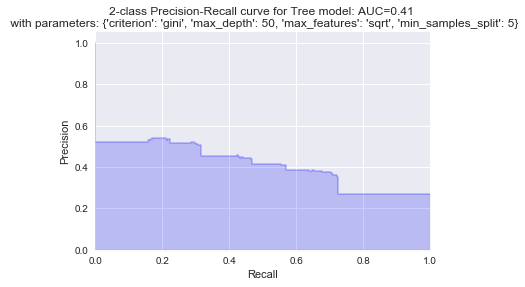

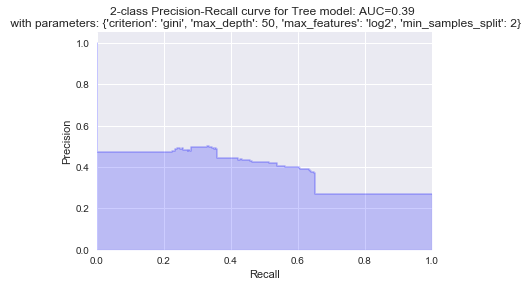

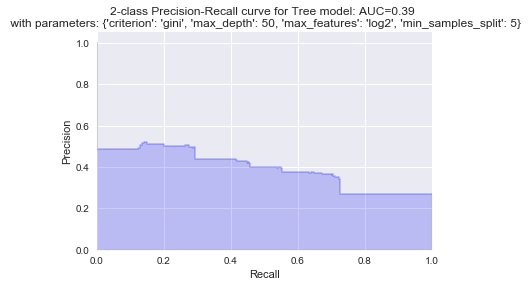

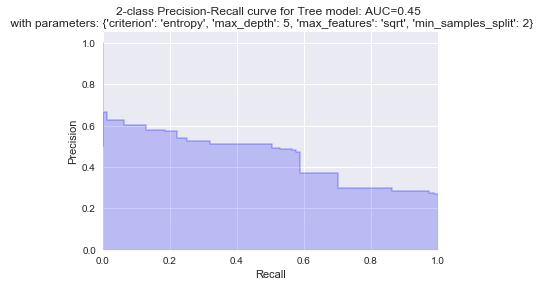

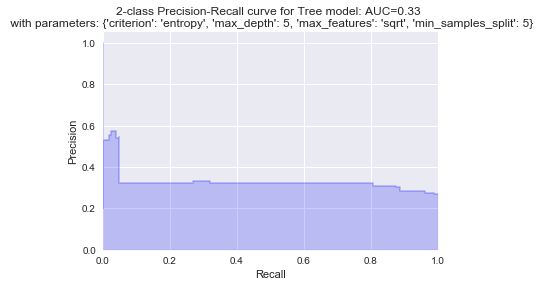

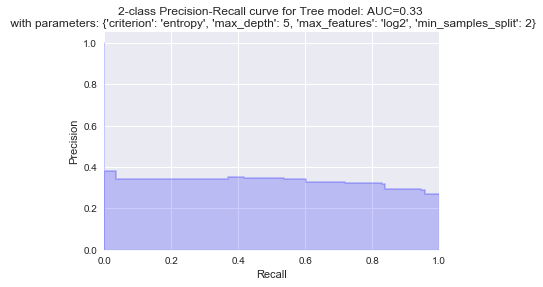

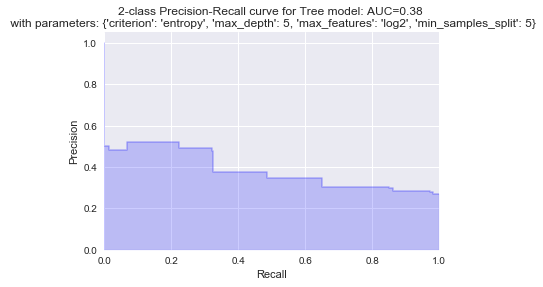

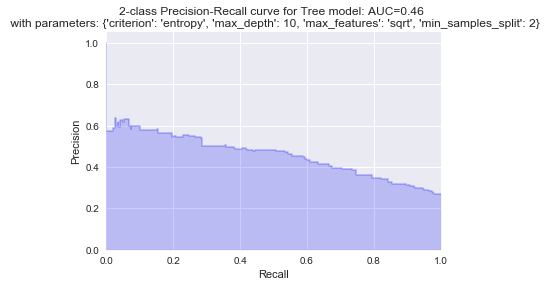

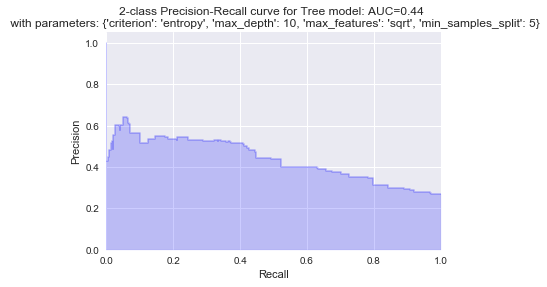

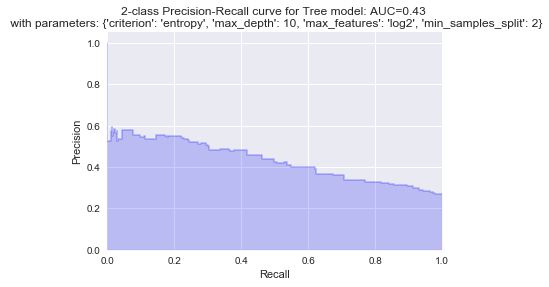

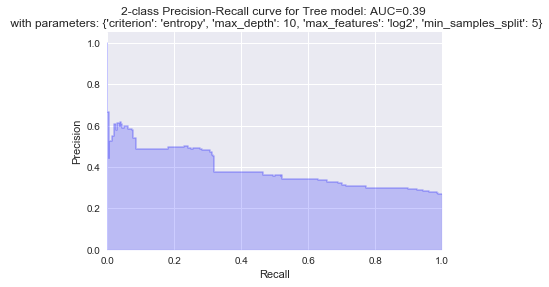

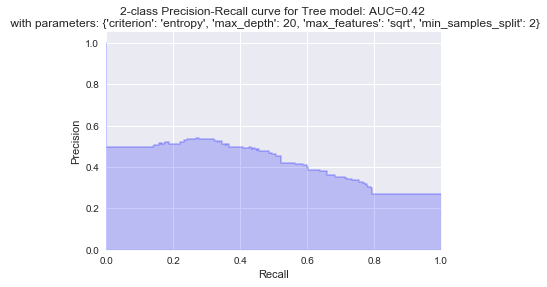

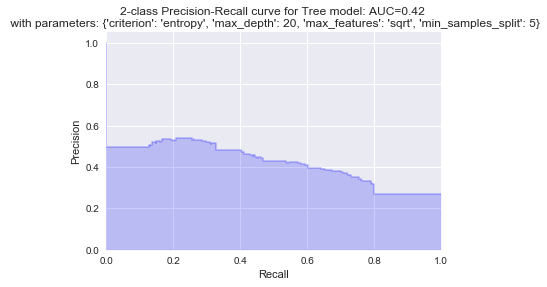

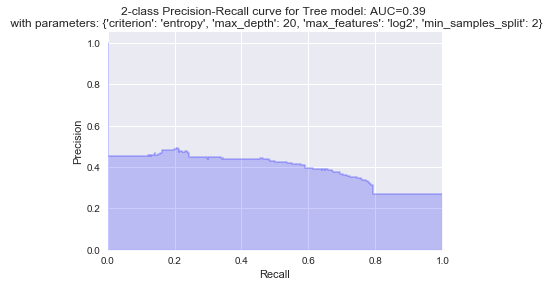

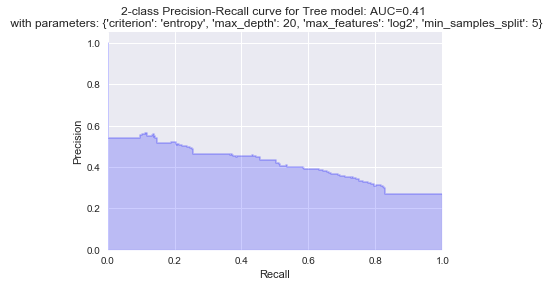

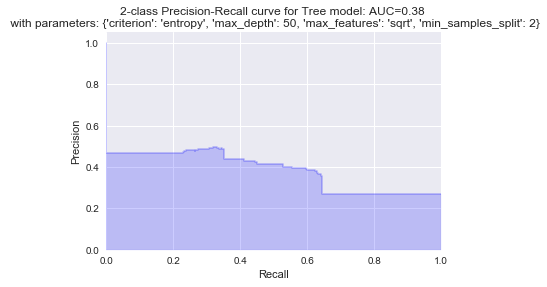

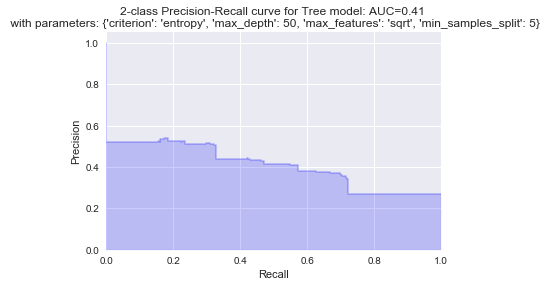

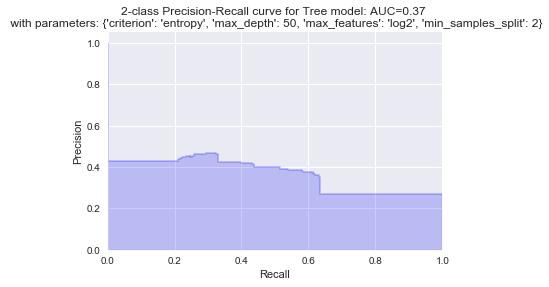

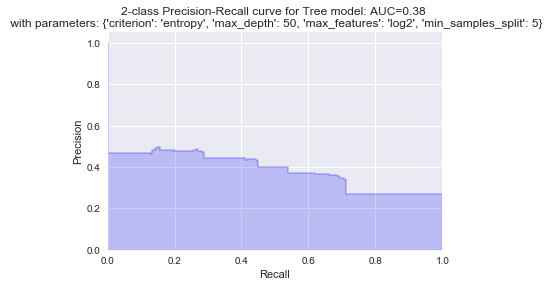

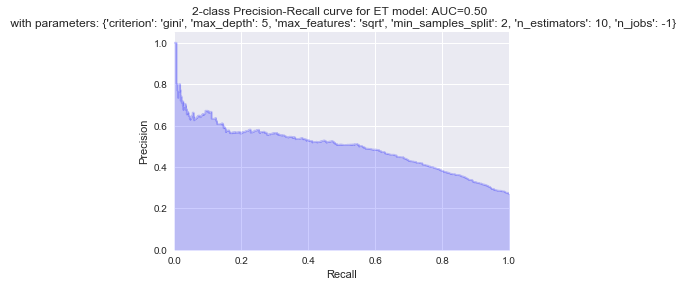

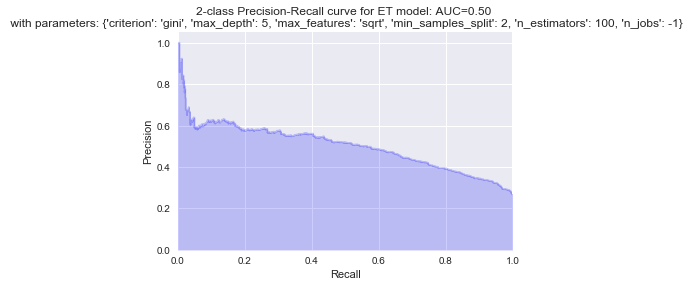

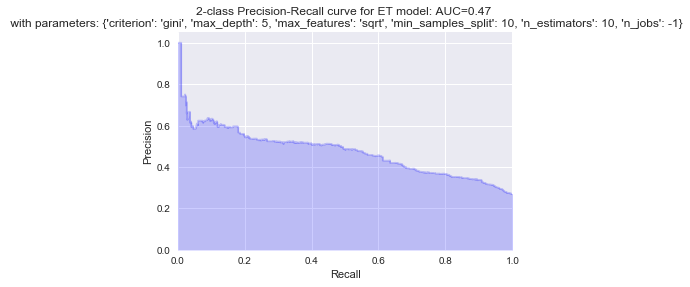

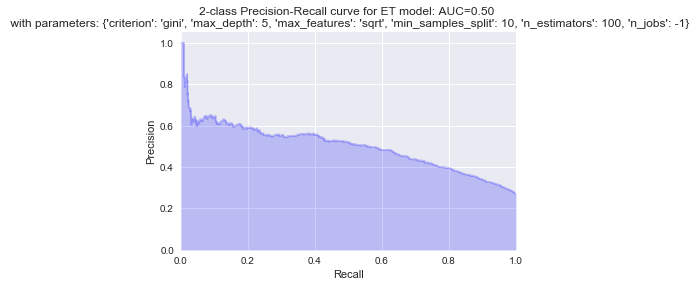

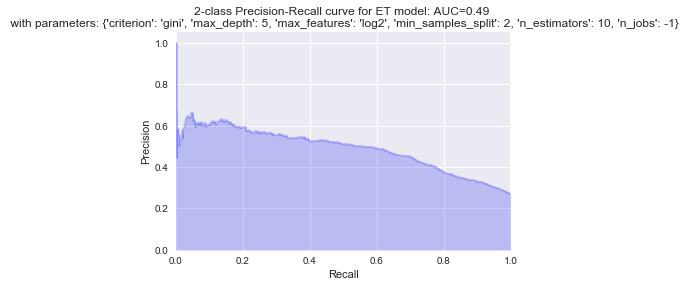

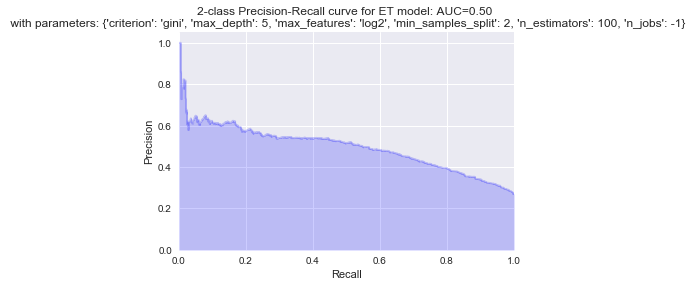

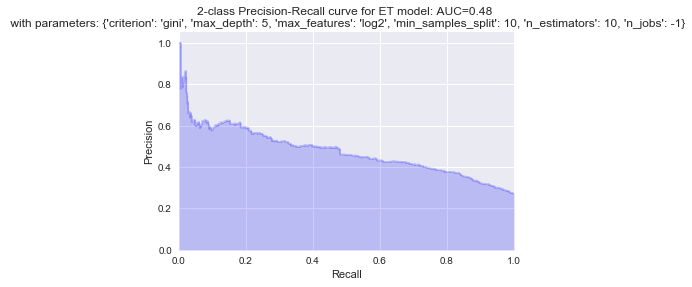

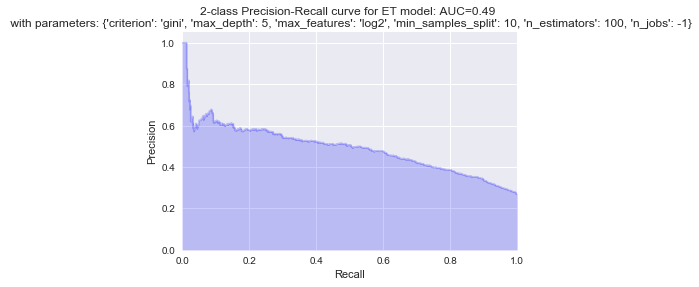

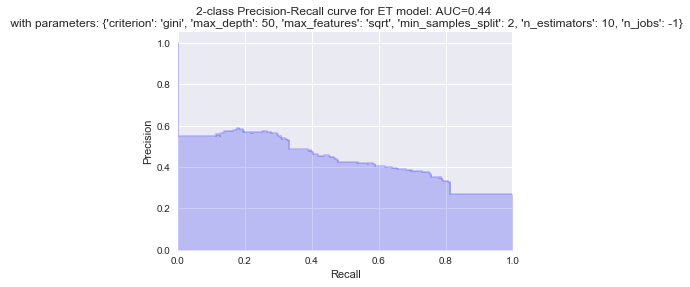

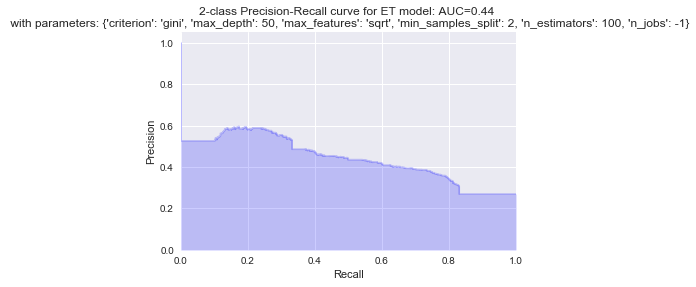

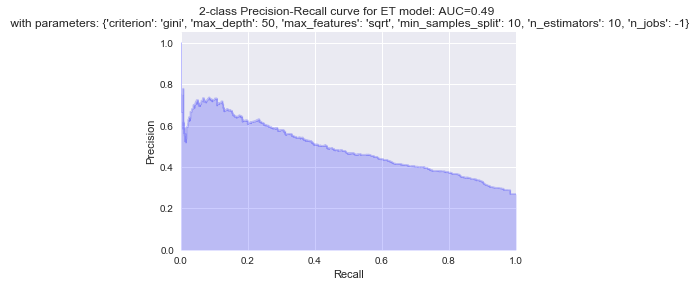

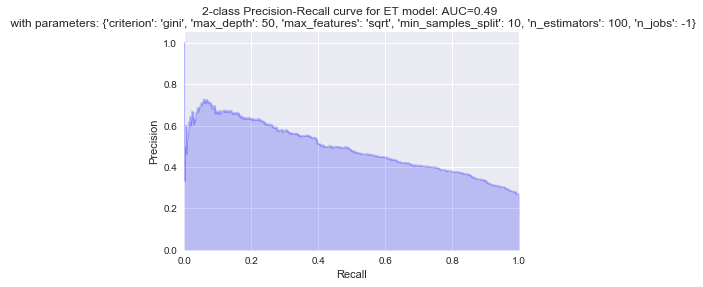

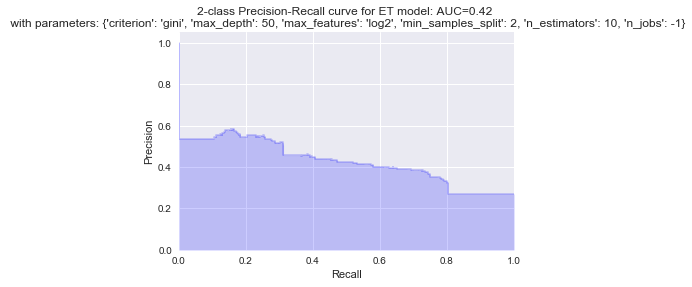

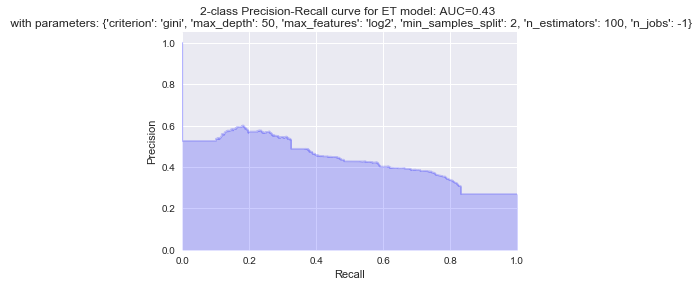

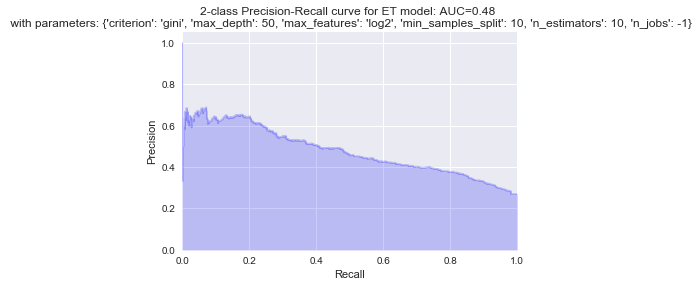

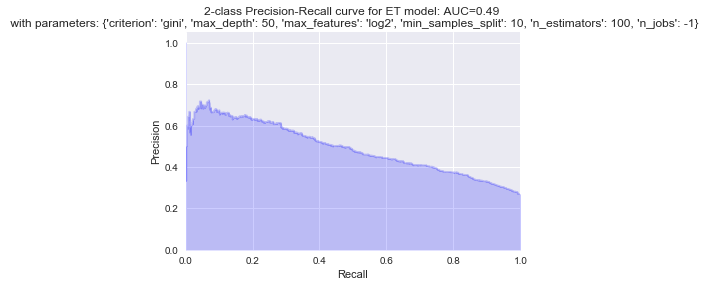

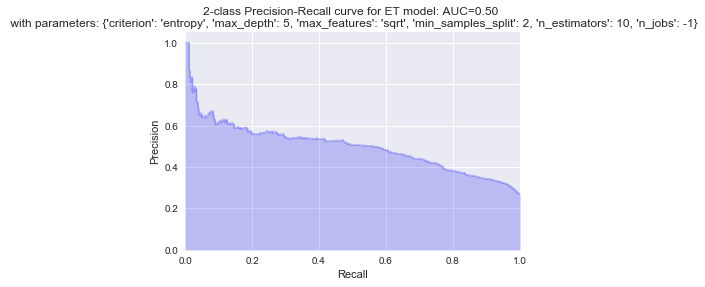

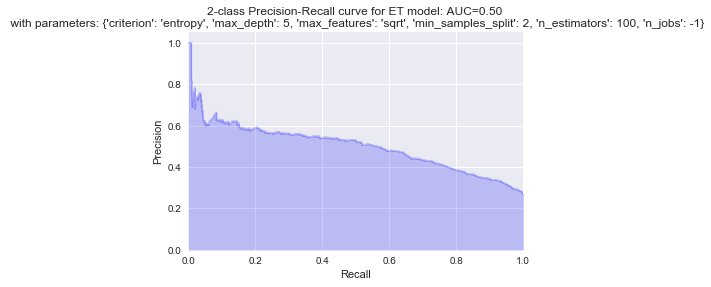

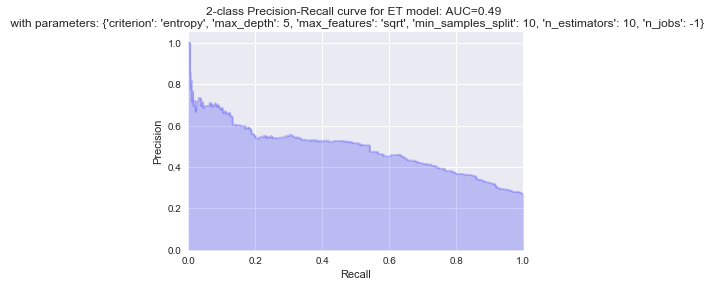

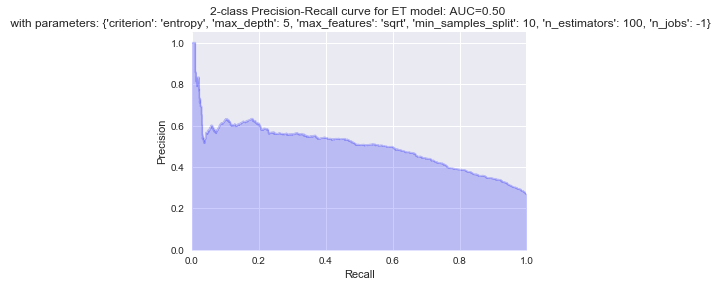

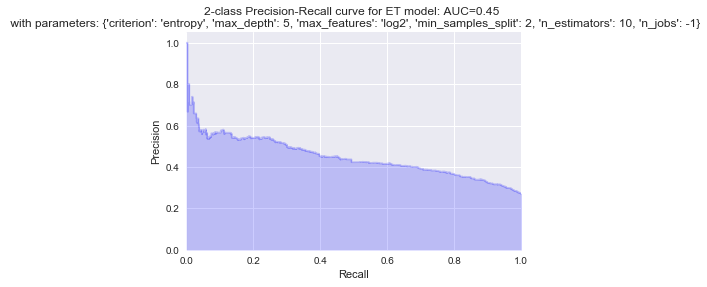

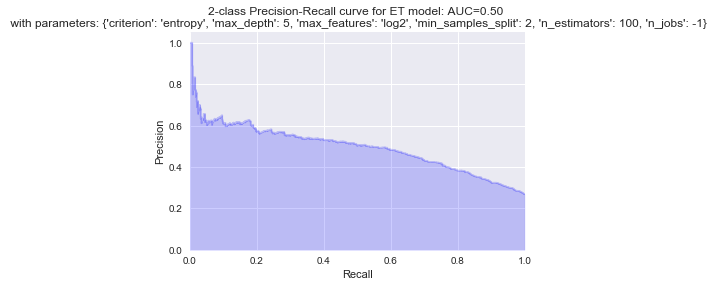

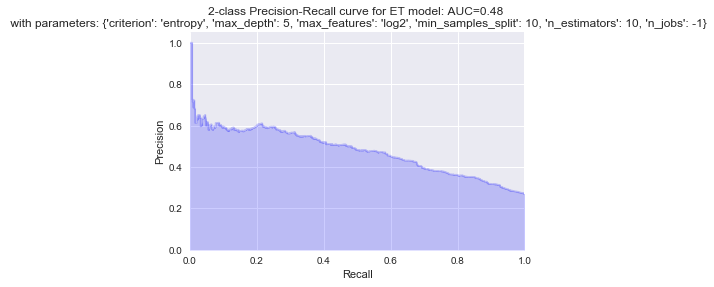

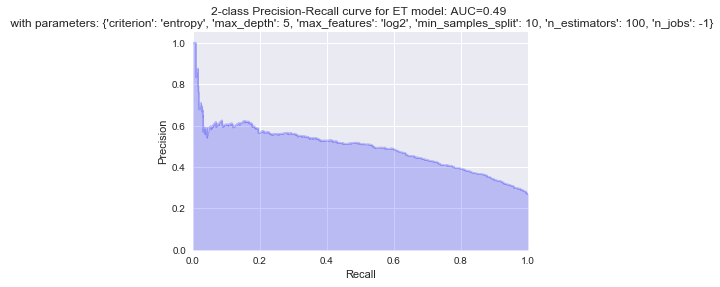

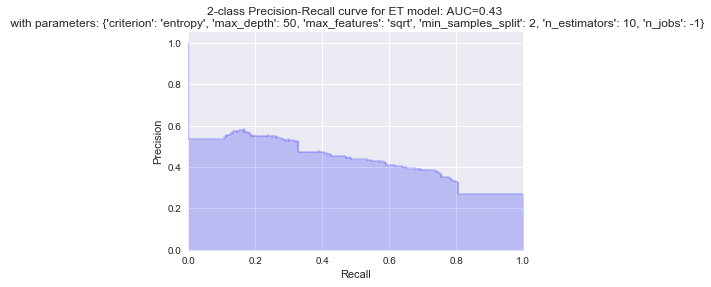

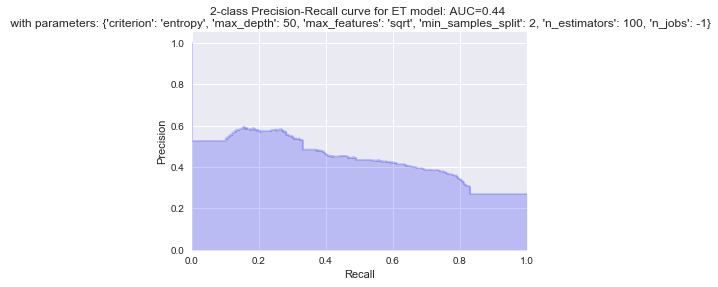

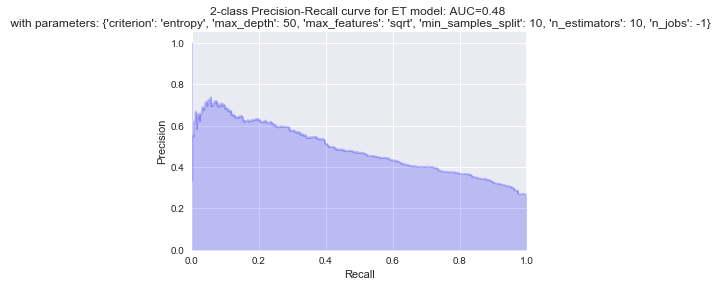

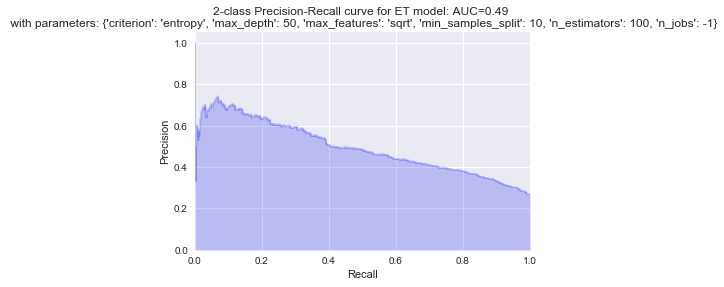

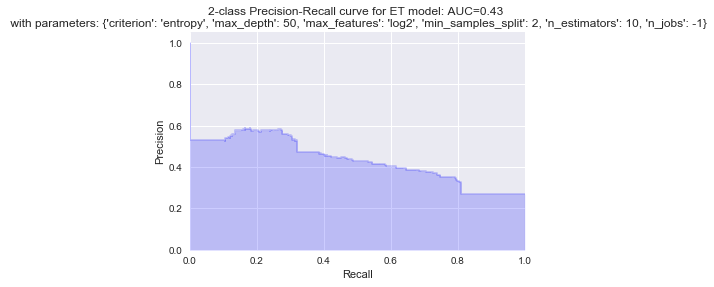

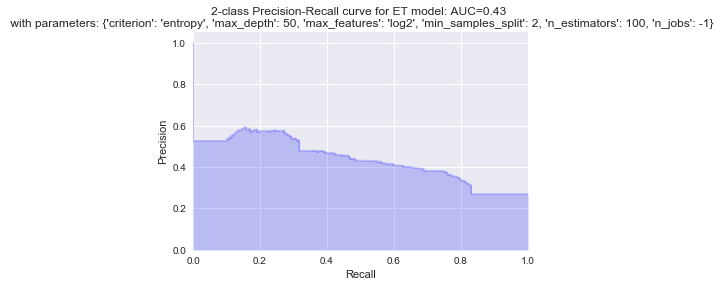

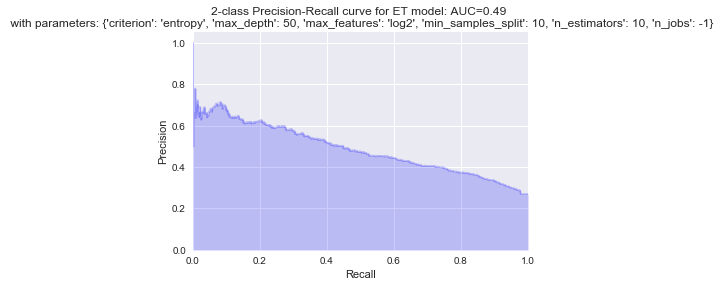

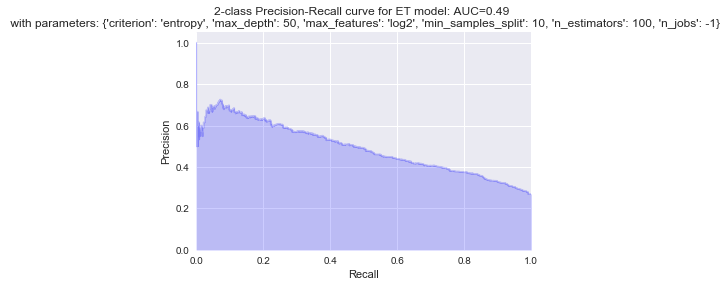

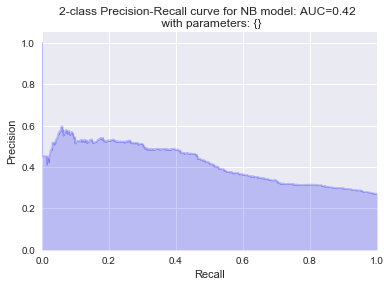

In [63]:
results2 = clf_loop(["RF", "Boost", "Bag", "Logit","KNN", "Tree",  "ET", "NB"], x_train, x_test, y_train2, y_test2)

In [64]:
from IPython.display import display
display(results2.tail(10))

model_type                                         parameters  auc-roc  \
111         ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...   0.7396   
112         ET  {'criterion': 'entropy', 'max_depth': 50, 'max...   0.6820   
113         ET  {'criterion': 'entropy', 'max_depth': 50, 'max...   0.6829   
114         ET  {'criterion': 'entropy', 'max_depth': 50, 'max...   0.7178   
115         ET  {'criterion': 'entropy', 'max_depth': 50, 'max...   0.7257   
116         ET  {'criterion': 'entropy', 'max_depth': 50, 'max...   0.6794   
117         ET  {'criterion': 'entropy', 'max_depth': 50, 'max...   0.6802   
118         ET  {'criterion': 'entropy', 'max_depth': 50, 'max...   0.7226   
119         ET  {'criterion': 'entropy', 'max_depth': 50, 'max...   0.7241   
120         NB                                                 {}   0.6541   

     precision    time  precision,recall,f1 at_5 precision,recall,f1 at_10  \
111     0.4932  0.5191  (0.6059, 0.1123, 0.1895)  (0.5706, 0.2116, 0.3087)   
112     0.4315  0.4452  (0.5647, 0.1047, 0.1766)    (0.55, 0.2039, 0.2975)   
113     0.4381  1.8352  (0.5412, 0.1003, 0.1693)  (0.5765, 0.2137, 0.3119)   
114     0.4848  0.4545   (0.6529, 0.121, 0.2042)  (0.6147, 0.2279, 0.3325)   
115     0.4934  1.5390  (0.6765, 0.1254, 0.2116)  (0.6088, 0.2257, 0.3294)   
116     0.4312  0.4533  (0.5647, 0.1047, 0.1766)  (0.5706, 0.2116, 0.3087)   
117     0.4349  1.5488  (0.5412, 0.1003, 0.1693)   (0.5971, 0.2214, 0.323)   
118     0.4872  0.3567  (0.6353, 0.1178, 0.1987)  (0.6029, 0.2236, 0.3262)   
119     0.4907  1.1976  (0.6647, 0.1232, 0.2079)  (0.6059, 0.2246, 0.3278)   
120     0.4153  0.0913  (0.5294, 0.0981, 0.1656)  (0.5235, 0.1941, 0.2832)   

    precision,recall,f1 at_20 precision,recall,f1 at_30  \
111  (0.5272, 0.3915, 0.4493)  (0.4922, 0.5485, 0.5188)   
112    (0.514, 0.3817, 0.438)   (0.455, 0.5071, 0.4796)   
113  (0.4993, 0.3708, 0.4255)  (0.4442, 0.4951, 0.4683)   
114  (0.5316, 0.3948, 0.4531)  (0.4638, 0.5169, 0.4889)   
115  (0.5272, 0.3915, 0.4493)  (0.4716, 0.5256, 0.4972)   
116   (0.5184, 0.385, 0.4418)  (0.4374, 0.4875, 0.4611)   
117  (0.4802, 0.3566, 0.4093)  (0.4403, 0.4907, 0.4642)   
118  (0.5272, 0.3915, 0.4493)   (0.4658, 0.5191, 0.491)   
119  (0.5316, 0.3948, 0.4531)  (0.4736, 0.5278, 0.4992)   
120    (0.486, 0.361, 0.4143)  (0.4315, 0.4809, 0.4549)   

    precision,recall,f1 at_50  
111  (0.4081, 0.7579, 0.5305)  
112  (0.3876, 0.7197, 0.5038)  
113  (0.3858, 0.7165, 0.5015)  
114   (0.3946, 0.7328, 0.513)  
115   (0.3958, 0.735, 0.5145)  
116  (0.3793, 0.7045, 0.4931)  
117  (0.3811, 0.7077, 0.4954)  
118  (0.3987, 0.7405, 0.5183)  
119   (0.3958, 0.735, 0.5145)  
120  (0.3488, 0.6478, 0.4534)

In [65]:
best2 = best_grid(results2)

model_type                                         parameters  auc-roc  \
30         Bag  {'max_features': 5, 'max_samples': 10, 'n_esti...   0.5959   
22       Boost      {'algorithm': 'SAMME.R', 'n_estimators': 100}   0.7390   
89          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...   0.7454   
54         KNN  {'algorithm': 'auto', 'n_neighbors': 50, 'weig...   0.7000   
44       Logit                        {'C': 0.1, 'penalty': 'l1'}   0.7390   
120         NB                                                 {}   0.6541   
1           RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   0.7447   
76        Tree  {'criterion': 'entropy', 'max_depth': 10, 'max...   0.7061   

     precision     time  precision,recall,f1 at_5 precision,recall,f1 at_10  \
30      0.3406   0.0569  (0.4294, 0.0796, 0.1343)  (0.4059, 0.1505, 0.2196)   
22      0.4927   1.8317    (0.6471, 0.12, 0.2024)  (0.5588, 0.2072, 0.3023)   
89      0.5022   0.6089  (0.6118, 0.1134, 0.1914)  (0.5794, 0.2148, 0.3134)   
54      0.4437  23.8857  (0.5706, 0.1058, 0.1785)    (0.55, 0.2039, 0.2975)   
44      0.4976   0.8928  (0.6412, 0.1189, 0.2006)  (0.5618, 0.2083, 0.3039)   
120     0.4153   0.0913  (0.5294, 0.0981, 0.1656)  (0.5235, 0.1941, 0.2832)   
1       0.5038   0.6877   (0.6235, 0.1156, 0.195)  (0.5706, 0.2116, 0.3087)   
76      0.4567   0.0401  (0.6353, 0.1178, 0.1987)  (0.5441, 0.2017, 0.2944)   

    precision,recall,f1 at_20  
30    (0.3568, 0.265, 0.3041)  
22   (0.5374, 0.3991, 0.4581)  
89   (0.5507, 0.4089, 0.4693)  
54    (0.4728, 0.3511, 0.403)  
44   (0.5389, 0.4002, 0.4593)  
120    (0.486, 0.361, 0.4143)  
1    (0.5536, 0.4111, 0.4718)  
76   (0.4993, 0.3708, 0.4255)

In [66]:
best2

{'Bag': {'max_features': [5], 'max_samples': [10], 'n_estimators': [20]},
 'Boost': {'algorithm': ['SAMME.R'], 'n_estimators': [100]},
 'ET': {'criterion': ['gini'],
  'max_depth': [5],
  'max_features': ['sqrt'],
  'min_samples_split': [2],
  'n_estimators': [100],
  'n_jobs': [-1]},
 'KNN': {'algorithm': ['auto'], 'n_neighbors': [50], 'weights': ['uniform']},
 'Logit': {'C': [0.1], 'penalty': ['l1']},
 'NB': {},
 'RF': {'max_depth': [5],
  'max_features': ['sqrt'],
  'min_samples_split': [2],
  'n_estimators': [100]},
 'Tree': {'criterion': ['entropy'],
  'max_depth': [10],
  'max_features': ['sqrt'],
  'min_samples_split': [2]}}

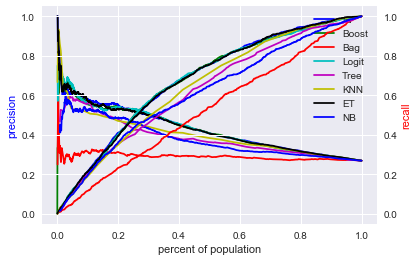

In [78]:
plot_mult(["RF", "Boost", "Bag", "Logit", "Tree", "KNN",  "ET", "NB"], x_train, x_test, y_train2, y_test2, best2)

In [75]:
def feature_importance(x_train, y_train, k=10):
    forest = ExtraTreesClassifier(n_estimators=100, max_depth=5, criterion='entropy', min_samples_split=10, n_jobs=-1,
                                random_state=0)

    forest.fit(x_train, y_train)
    importances = forest.feature_importances_
    current_palette = sns.color_palette(sns.color_palette("hls", 8))
    indices = np.argsort(importances)[::-1]
    indices = indices[:k]

    # Print the feature ranking
    print("Feature ranking:")

    labels_arr = []
    for f in range(len(indices)):
        label = indepv[indices[f]]
        labels_arr.append(label)
        print("%d. %s (%f)" % (f+1, label, importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(len(indices)), importances[indices], align="center", tick_label = labels_arr, color= current_palette)
    plt.xlim([-1, len(indices)])
    plt.xticks(range(len(indices)),labels_arr, rotation = 'vertical')
    plt.show()

Feature ranking:
1. mh_treatment (0.361167)
2. bail_amt_binned0 (0.103079)
3. bailed_out (0.100312)
4. bail_typeSUR (0.063213)
5. case_typeCR (0.052037)
6. case_typeJV (0.042061)
7. bail_typePR (0.029539)
8. mar_statM (0.027587)
9. case_typeDV (0.025815)
10. per_capita_income_binned1 (0.016512)
11. mar_statS (0.016061)
12. per_capita_income_binned0 (0.013785)
13. property_value_occupied_binned0 (0.011959)
14. bail_typeORCD (0.010262)
15. grandparent_care_binned0 (0.009042)


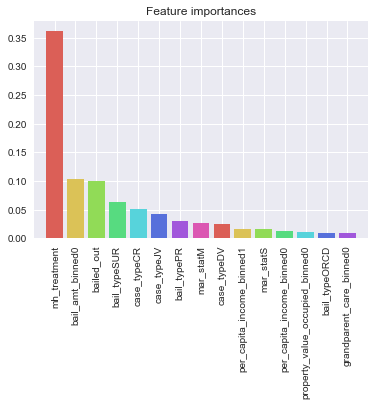

In [76]:
feature_importance(x_train, y_train,15)

Feature ranking:
1. mh_treatment (0.329648)
2. bail_amt_binned0 (0.112130)
3. bailed_out (0.111258)
4. bail_typeSUR (0.082955)
5. bail_typePR (0.037748)
6. case_typeCR (0.037330)
7. case_typeJV (0.034715)
8. case_typeDV (0.029306)
9. mar_statM (0.027306)
10. per_capita_income_binned0 (0.017875)
11. mar_statS (0.015083)
12. per_capita_income_binned1 (0.014749)
13. bail_typeORCD (0.009812)
14. bail_typeCA (0.009739)
15. property_value_occupied_binned0 (0.009525)


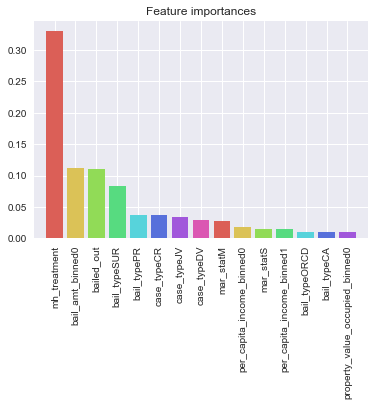

In [53]:
feature_importance(x_train, y_train2, 15)

In [71]:
def plot_mult(models, x_train, x_test, y_train, y_test, bestm):
    '''
    Run model with the best given params on x and y
    and print out all the best models' on the same graph
    '''

    for index, clf in enumerate([clfs[x] for x in models]):
        model_params = bestm[models[index]]
        for p in ParameterGrid(model_params):
            try:
                clf.set_params(**p)
                y_pred_probs = clf.fit(x_train, y_train).predict_proba(x_test)[:,1]
                
                precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_test, y_pred_probs)
                precision_curve = precision_curve[:-1]
                recall_curve = recall_curve[:-1]
                pct_above_per_thresh = []
                number_scored = len(y_pred_probs)
                for value in pr_thresholds:
                    num_above_thresh = len(y_pred_probs[y_pred_probs>=value])
                    pct_above_thresh = num_above_thresh / float(number_scored)
                    pct_above_per_thresh.append(pct_above_thresh)
                pct_above_per_thresh = np.array(pct_above_per_thresh)
                
                ax1.plot(pct_above_per_thresh, precision_curve, c=colors[color_index])
                ax2.plot(pct_above_per_thresh, recall_curve, c=colors[color_index])                
            except IndexError as e:
                print(e)
                continue
        color_index += 1
        if color_index >= 7:
            color_index = 0
    ax1.legend(models)
    plt.show()

In [81]:
#Printing out the best decision tree
def print_tree(x_train, y_train, bestm, models=["Tree"]):
    for index, clf in enumerate([clfs[x] for x in models]):
        model_params = bestm[models[index]]
        for p in ParameterGrid(model_params):
            clf.set_params(**p)
            tree = clf.fit(x_train, y_train)
            tree_viz = export_graphviz(tree, out_file=None, feature_names=indepv, rounded=True, filled=True)
            graph =graphviz.Source(tree_viz)
            
    return graph

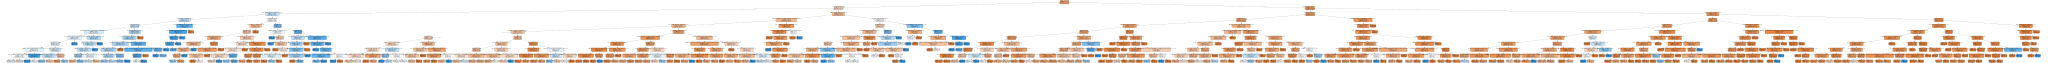

In [82]:
print_tree(x_train, y_train, best)

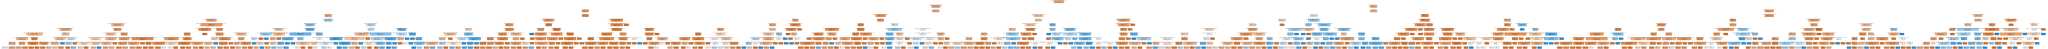

In [83]:
print_tree(x_train, y_train2, best2)